In [2]:
import numpy as np
import math
from fractions import Fraction
import itertools
import biotuner
from biotuner.biotuner_utils import *
from biotuner.biotuner_functions import *
from biotuner.biotuner_object import *
from biotuner.biotuner2d import *
import matplotlib.pyplot as plt
from numpy import array, zeros, ones, arange, log2, sqrt, diff, concatenate
import os
import time
import mne

pygame 2.0.1 (SDL 2.0.14, Python 3.7.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


C:\Users\Dell\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Dell\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Dell\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Dell\Anaconda3\lib\site-packages\mne\viz\backends\renderer.py:34: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  level=1, fromlist=_fromlist)


## Comparing EEG data with surrogate and noise data 

### Using Sleep data
#### Load the 'sleep_data.npy' file from the eeg_data folder. These data are from : https://www.physionet.org/content/sleep-edfx/1.0.0/

#### The graph_surrogates function allows to compare the distribution of consonance metrics for a EEG, surrogates and noise data. 
#### In the present case the metrics that can be used are: 'tenney', 'harmsim', 'euler', 'cons', 'harm_fit'

In [4]:
sleep_data = np.load('eeg_data/sleep_data_Cz.npy', allow_pickle = True)
sleep_conditions = ['wake', 'stage1', 'stage2', 'stage3', 'stage4', 'REM']

In [ ]:
savefolder = 'C:/Users/Dell/GitHub/biotuner_dev/dev/graphs/' #Choose your folder the save the images
peaks_functions = ['EEMD', 'fixed']
sf = 100
for p in peaks_functions:
    for e in range(len(sleep_data)): 
        conditions = ['eeg', 'pink', 'white', 'phase']
        metric_to_graph = 'harmsim'
        data = np.array(sleep_data[e], dtype='float64')
        graph_surrogates(data, sf, conditions, metric_to_graph, p, 0.5, savefolder, str(e), low_cut = 1, high_cut = (sf/2)-0.1)

### EMPIRICAL MODE DECOMPOSITION
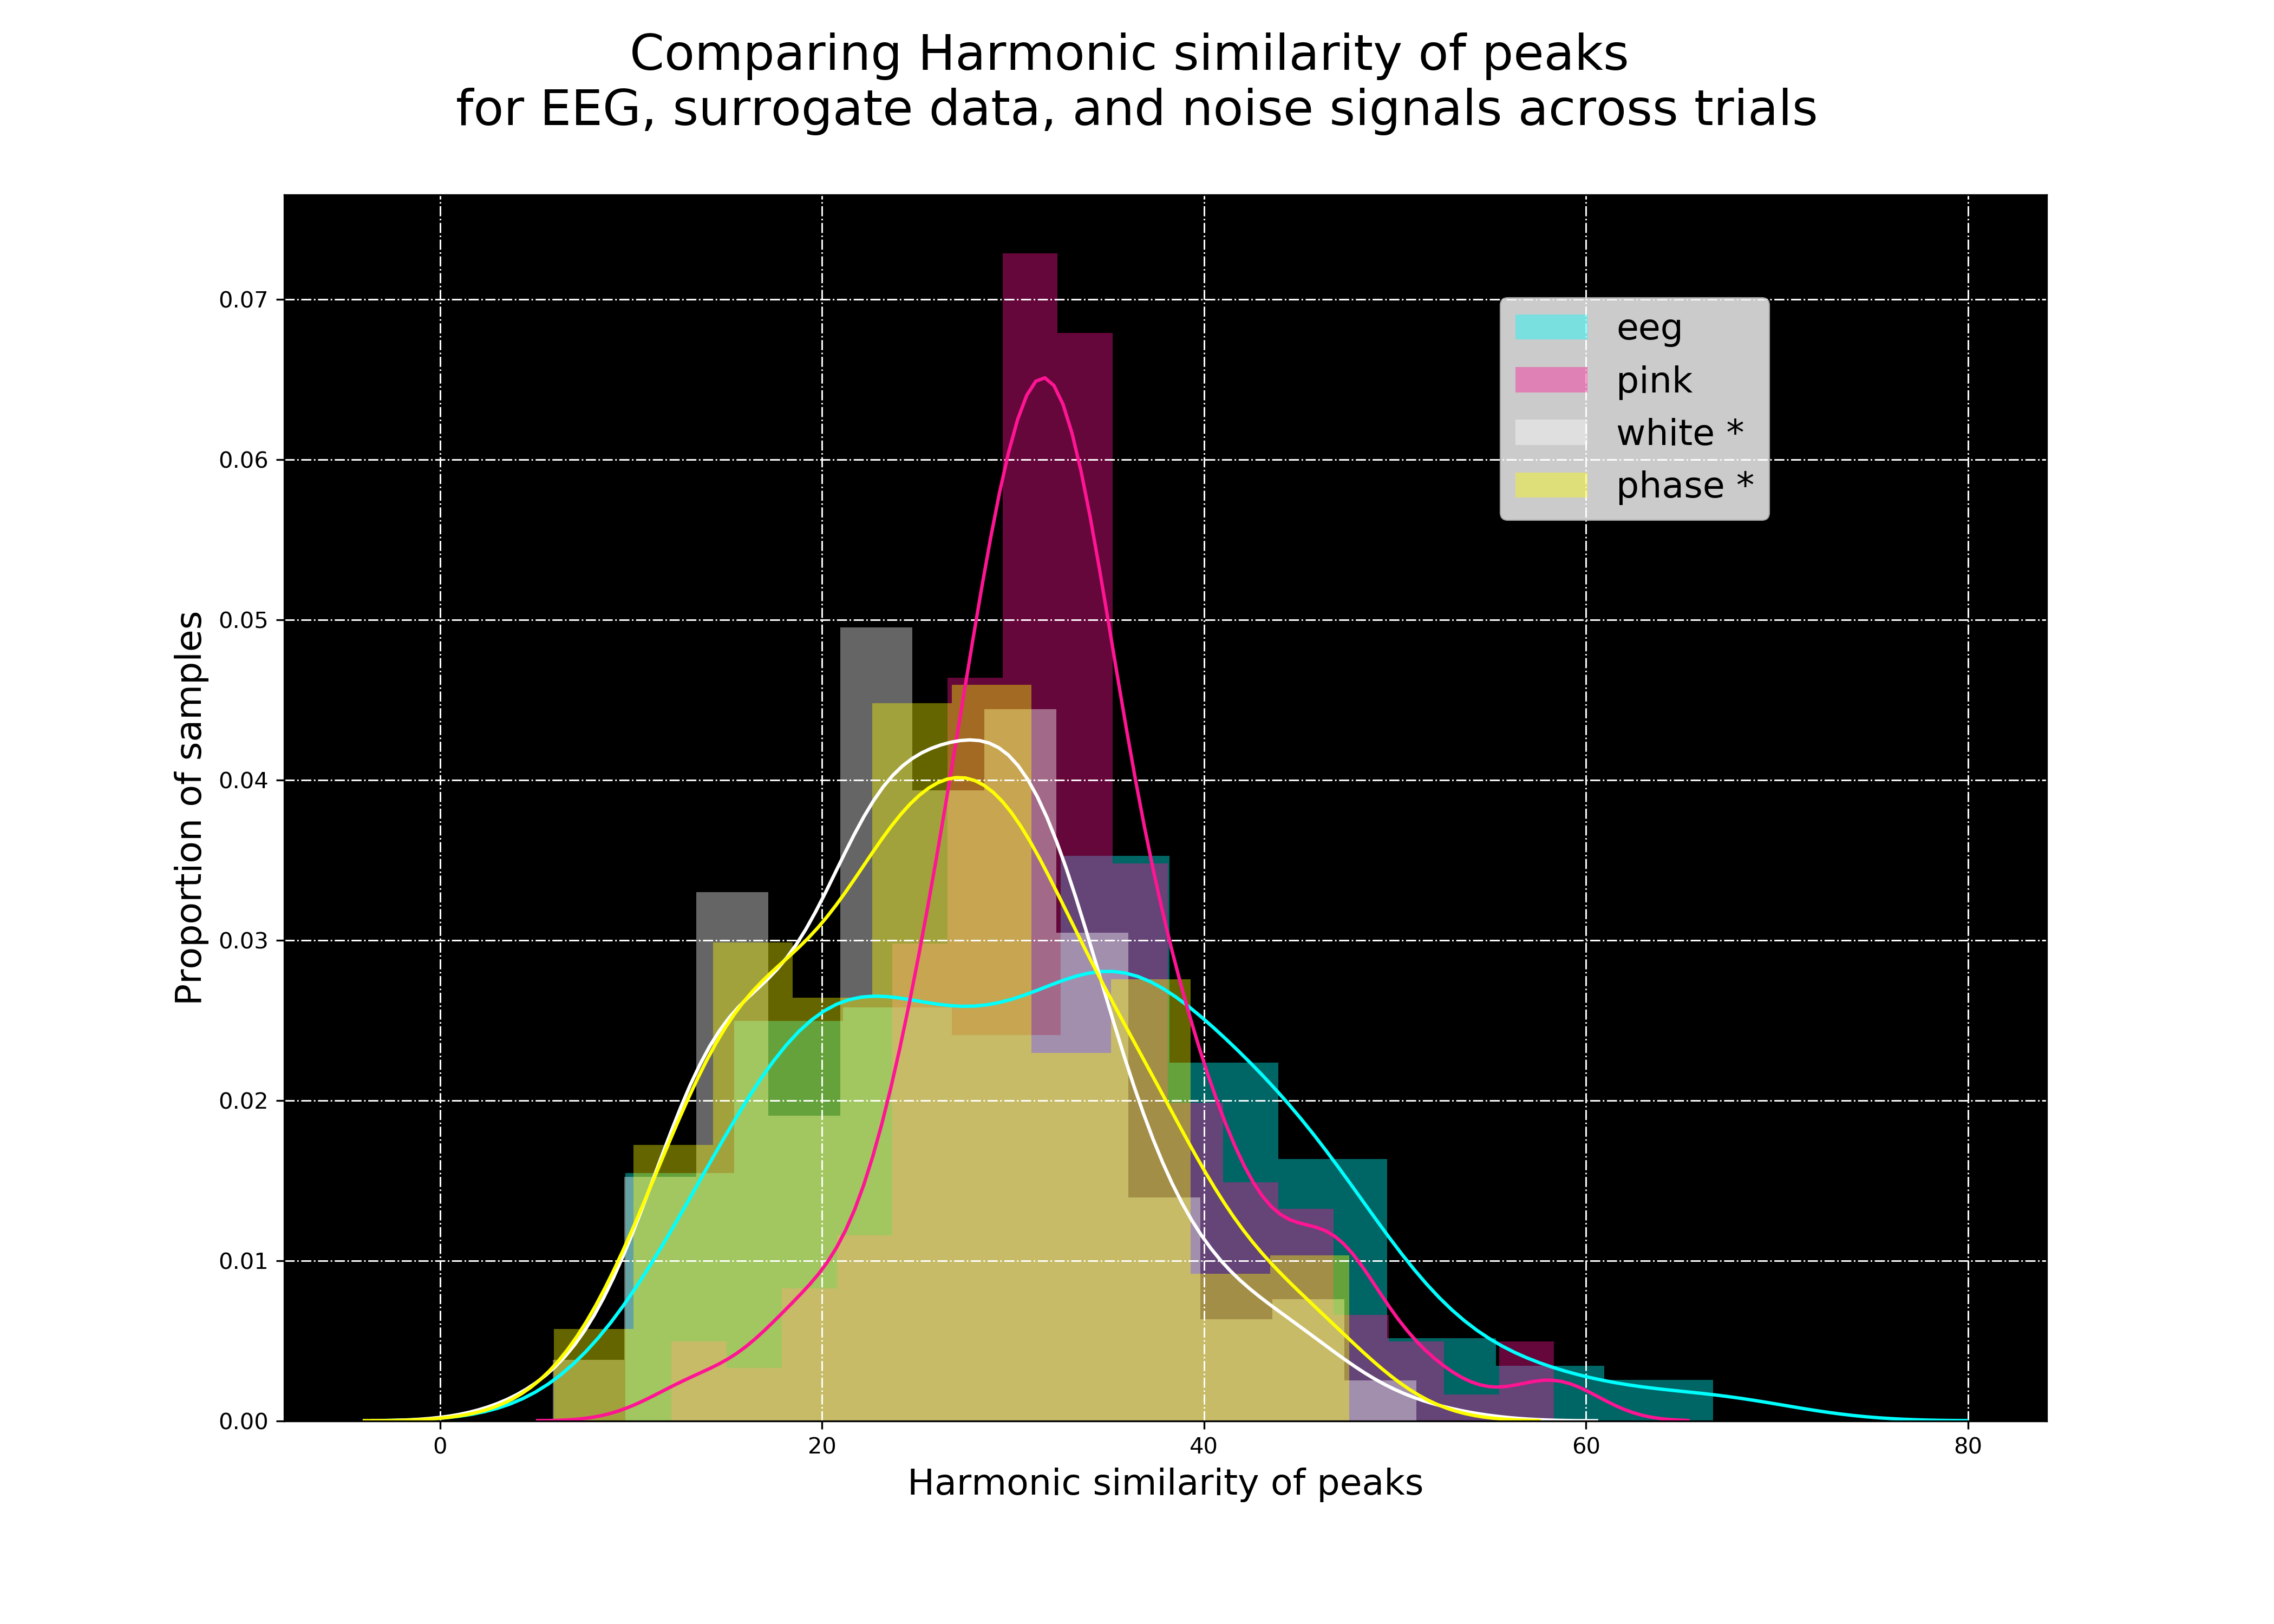

### FIXED BANDS
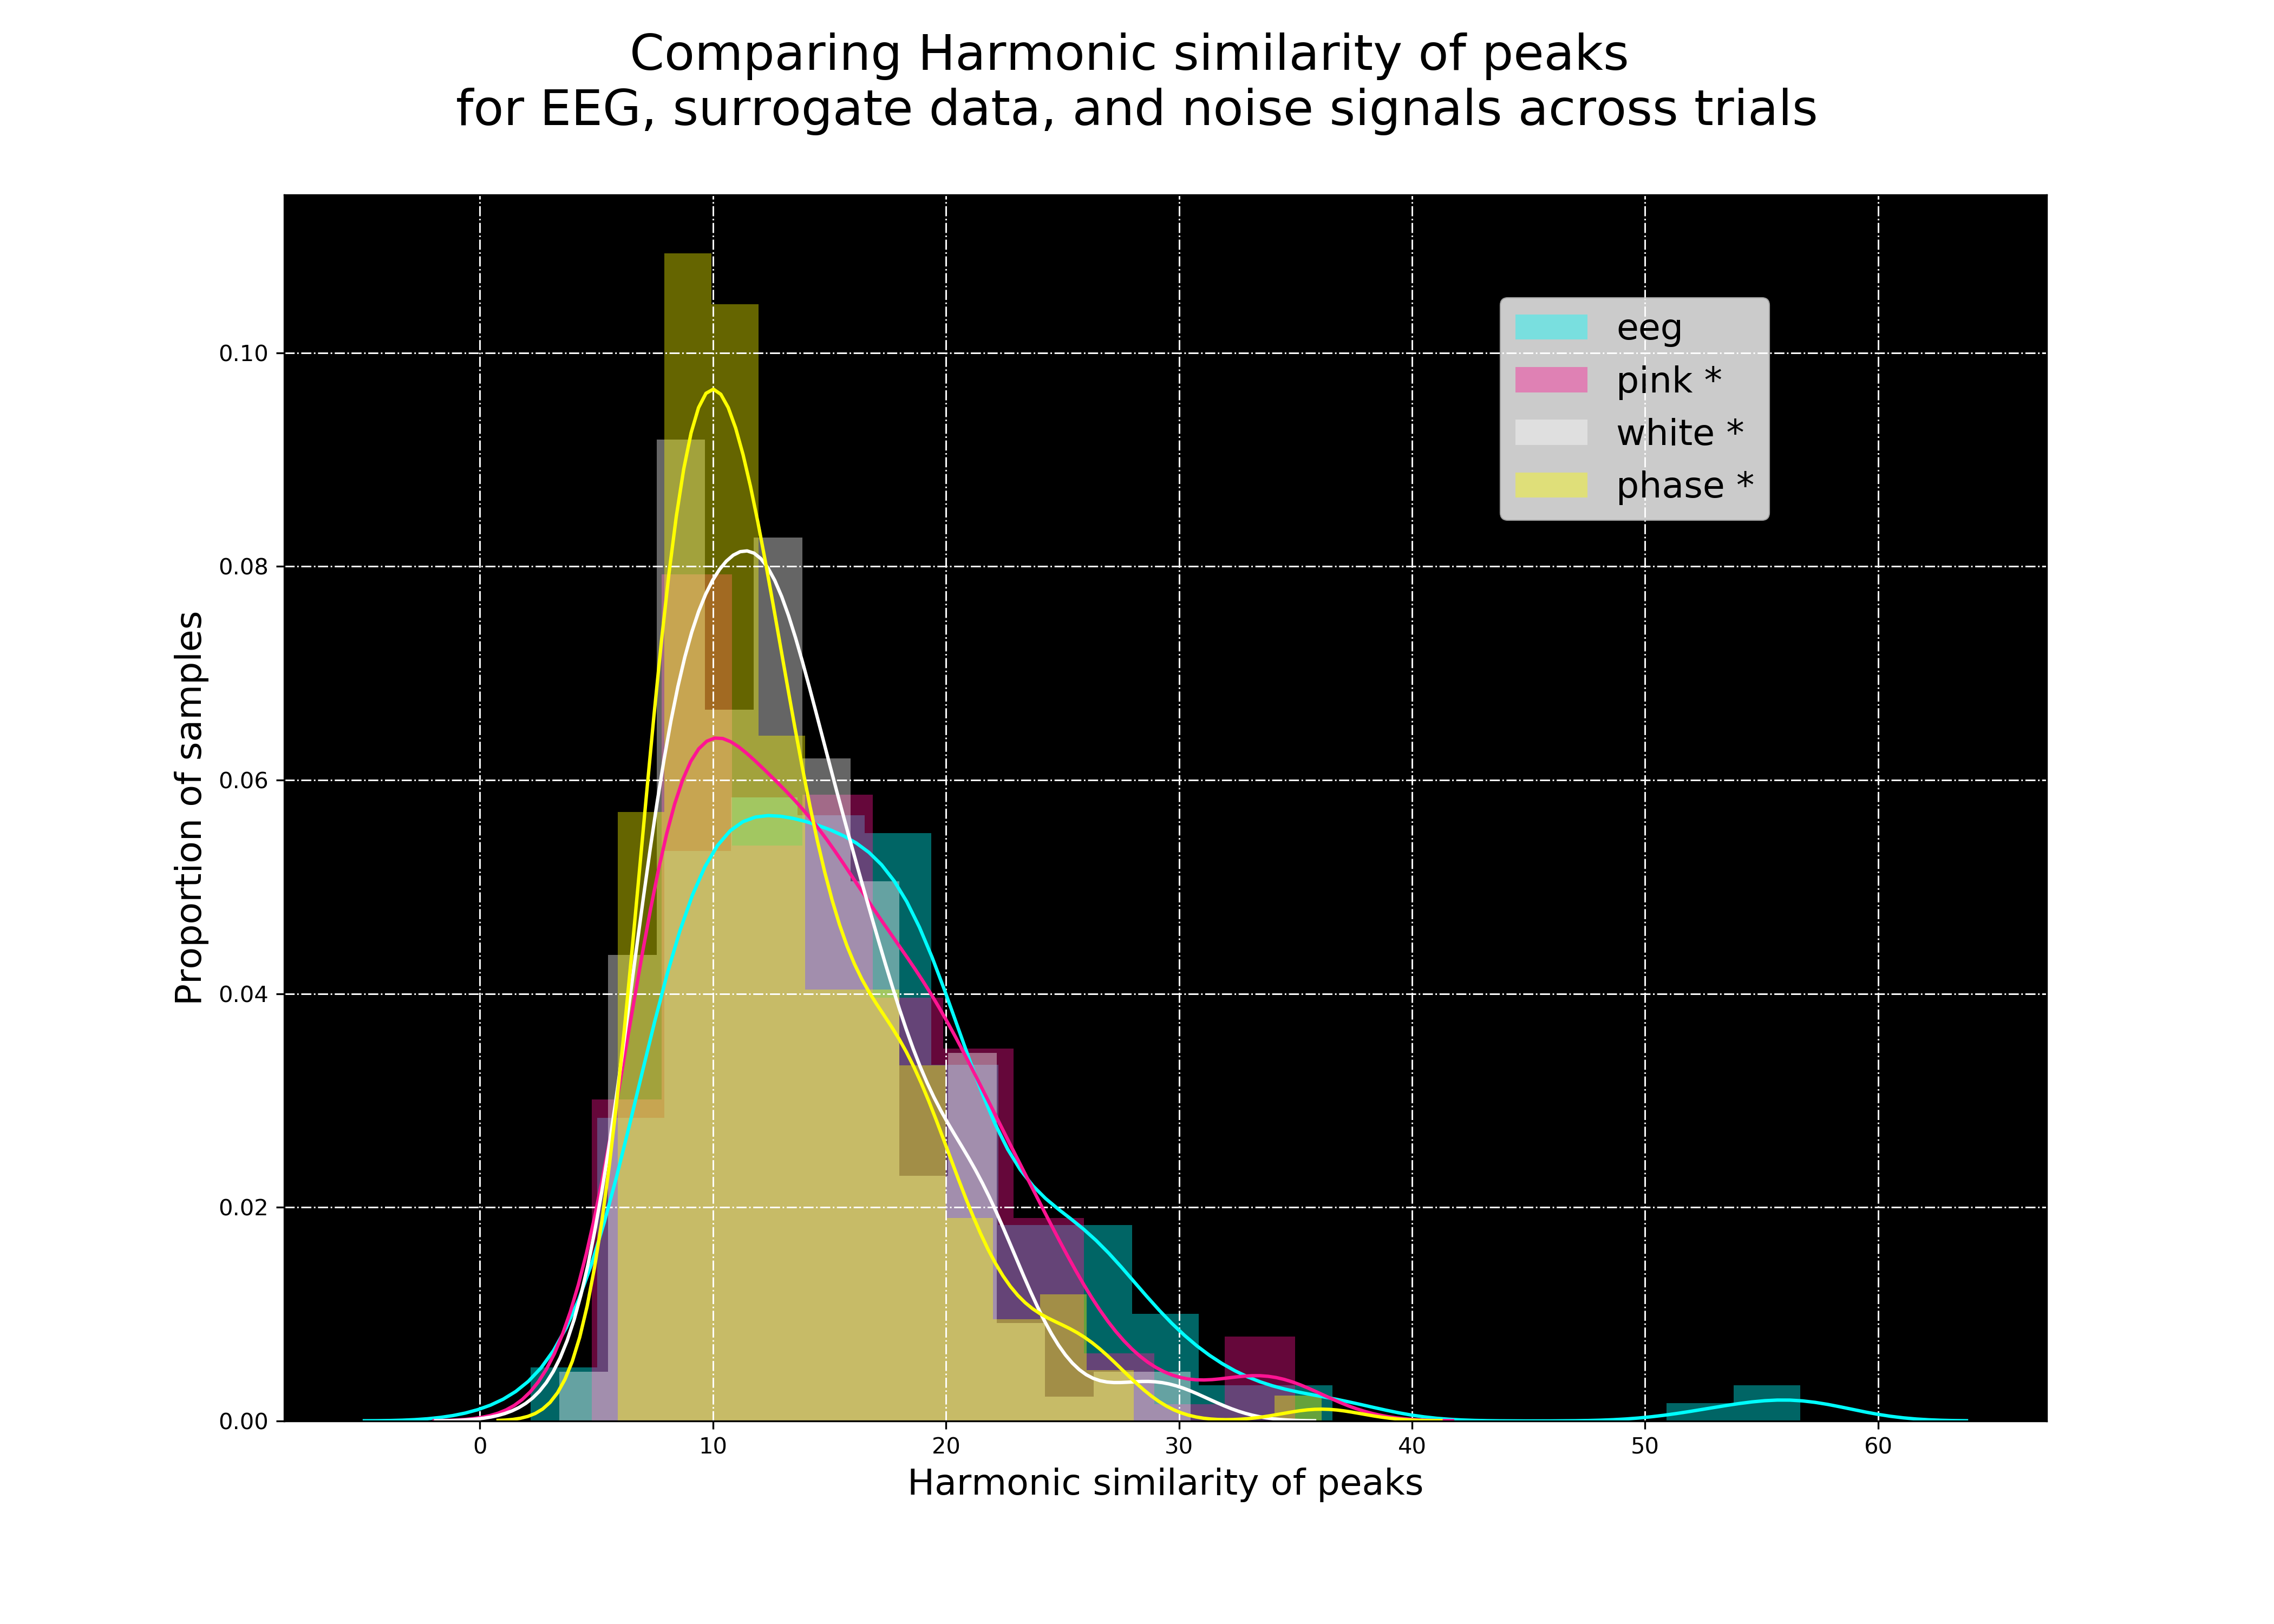

## Using pareidolia data

Compare distributions of EEG data and simulated noise data for different peak extraction algorithms and consonance metrics

In [ ]:
channels= ['O1','O2','T7','T8','C3','C4']
savefolder = 'C:/Users/Dell/GitHub/biotuner_dev/dev/graphs/pareidolia/' #Choose your folder the save the images
peaks_functions = ['EEMD', 'adapt', 'fixed']
metrics = ['cons', 'tenney']
sf = 1000
for p in peaks_functions:
    for channel in channels: 
        for metric in metrics:
            conditions = ['eeg', 'pink', 'white', 'phase', 'blue']
            metric_to_graph = metric
            data = np.load('eeg_data/pareidolia_data_'+channel+'.npy')
            graph_surrogates(data, sf, conditions, metric_to_graph, p, 0.5, savefolder, str(channel), low_cut = 0.5, high_cut = 150)

[ 1.   2.5  8.5 12.5 40. ]
[ 1.5  3.5  9.  10.  29.5]
[ 1.5  2.5  8.  15.  30.5]
[ 2.   5.5  8.  15.  39. ]
[ 1.5  4.  10.   8.5 56. ]
[ 2.   3.   7.5 19.5 44.5]
[ 1.5  2.5  4.  12.  23. ]
[ 1.   3.   4.5 11.5 27.5]
[ 2.  4.  9. 12. 31.]
[ 1.5  3.   5.5 10.5 26. ]
[ 1.   3.5 10.  15.5 33.5]
[ 1.   2.5  6.  11.  35. ]
[ 1.5  3.5  7.  14.  45. ]
[ 1.5  3.5  8.  10.  28.5]
[ 1.   3.5  7.5 12.  41. ]
[ 1.5  3.5  8.  10.  54. ]
[ 1.5  2.5  9.5 12.5 33.5]
[ 1.5  3.5  7.5 18.5 54.5]
[ 1.   3.5  7.5 13.  29.5]
[ 2.   2.5  5.5 18.5 46.5]
[ 1.5  4.5  9.5 25.5 52.5]
[ 1.5  3.   9.   8.  26.5]
[ 1.5  4.   9.  12.  27.5]
[ 1.  2.  5. 10. 23.]
[ 2.   5.5  6.5 12.  40. ]
[ 1.5  3.   6.5  6.5 13.5]
[ 2.  5.  8. 21. 38.]
[ 1.5  4.   5.5 10.5 33.5]
[ 2.   3.5  7.5 10.  16.5]
[ 1.  2.  6.  7. 19.]
[ 1.5  4.  11.  13.  31. ]
[ 1.   1.5  5.5  9.  25.5]
[ 1.5  3.   6.5 17.  52.5]
[ 1.5  3.5  6.5 11.5 33. ]
[ 1.5  4.   8.5 15.  34. ]
[ 1.   3.   8.5 13.  29.5]
[ 1.5  2.5  7.5 22.  41. ]
[ 1.   3.   5.5 11.5 

[ 3.5  8.5 17.5 30.  61.5]
[ 2.5  5.  14.5 39.5 57.5]
[ 2.   7.  11.5 28.  62.5]
[ 2.5  3.5 11.  25.  44.5]
[ 2.   4.5  7.5 18.5 65. ]
[ 3.  7. 11. 21. 50.]
[ 1.5  4.5  9.  21.5 50. ]
[ 2.   5.  14.  19.5 54. ]
[ 2.   4.5 12.5 19.5 65. ]
[ 2.  5.  8. 25. 62.]
[ 2.  4. 10. 21. 44.]
[ 1.5  3.5  8.5 26.  52. ]
[ 2.   7.  10.  26.5 48.5]
[ 2.5  6.5 13.  21.5 48.5]
[ 2.   4.   9.5 32.5 48.5]
[ 1.5  4.5  9.5 23.  43.5]
[ 3.   4.5 11.5 22.5 46.5]
[ 3.   7.5 14.5 26.  54.5]
[ 3.   5.  13.  22.  49.5]
[ 2.5  7.5 14.  25.  67.5]
[ 3.  7. 14. 28. 50.]
[ 3.   6.5  8.  28.  62. ]
[ 3.5  5.5 12.5 28.5 58.5]
[ 2.5  5.  12.  25.  50.5]
[ 1.   5.   7.5 25.  38.5]
[ 4.   6.   9.5 19.  43.5]
[ 2.5  4.5 11.  32.  56. ]
[ 3.5  5.  14.5 26.  41.5]
[ 2.5  4.  11.5 14.5 43.5]
[ 2.5  6.5 13.5 30.  51.5]
[ 1.5  4.   8.5 22.5 43.5]
[ 3.   5.5 11.5 19.5 36. ]
[ 2.   6.   9.5 20.  45. ]
[ 3.   7.  17.  32.5 60.5]
[ 3.   7.5 11.5 29.  53. ]
[ 3.   5.  12.  25.5 53. ]
[ 2.5  7.  11.5 23.5 40. ]
[ 2.   5.   8.5 24.5 

[ 2.   3.5  7.5 10.  30. ]
[ 1.   2.   8.  14.5 24. ]
[ 2.5  5.   7.5  7.  27.5]
[ 1.5  2.5  5.5  9.  23.5]
[ 1.5  1.5  4.   9.5 28.5]
[ 1.  2.  6. 10. 26.]
[ 0.5  3.  12.  24.5 54. ]
[ 1.   3.5  7.  18.5 50. ]
[ 2.   4.   5.  25.5 34. ]
[ 2.   3.   6.5 21.  42.5]
[ 1.5  3.  10.5 18.  66. ]
[ 2.   5.5  9.5 20.5 52. ]
[ 1.5  3.  11.5 25.  34. ]
[ 1.   3.5 12.5 24.  42. ]
[ 2.  2.  9. 19. 47.]
[ 2.5  5.  11.5 28.5 45. ]
[ 1.   3.5  8.5 23.  58. ]
[ 1.5  4.   9.5 22.  58. ]
[ 2.   3.5 10.  24.5 56. ]
[ 1.5  4.   7.5 26.5 34.5]
[ 1.5  2.5  8.  14.5 46. ]
[ 2.   5.  12.5 22.  44. ]
[ 3.   3.  13.5 25.5 47.5]
[ 1.5  4.   9.  16.5 58.5]
[ 2.   3.5  9.  23.  61.5]
[ 2.   6.5  9.5 30.  54.5]
[ 2.   5.   7.5 20.  59. ]
[ 2.5  3.   8.5 23.5 63.5]
[ 2.   5.   7.5 24.5 41. ]
[ 2.   2.5  9.5 23.  35.5]
[ 3.5  6.   9.5 27.  38.5]
[ 2.   5.5  6.  19.5 44.5]
[ 2.   4.   7.5 20.  40.5]
[ 1.5  4.   4.5 27.  55. ]
[ 3.5  5.  18.  30.5 60.5]
[ 1.5  7.5 12.5 17.5 45.5]
[ 2.  4. 13. 18. 44.]
[ 1.5  4.5 12.5 

[ 3.5  8.5 14.5 31.5 67. ]
[ 2.5  6.  11.  19.5 50.5]
[ 2.5  4.5 10.  28.5 54. ]
[ 2.5  5.5 15.  25.5 43.5]
[ 2.5  3.5  9.5 21.  41.5]
[ 2.5  4.  12.5 24.  54. ]
[ 3.   6.5 11.5 26.  65. ]
[ 3.5  3.  10.5 24.  40. ]
[ 2.   5.  10.5 26.5 59. ]
[ 2.   4.   9.  19.  43.5]
[ 2.5  4.5  8.5 29.5 45. ]
[ 2.5  5.5 11.5 19.5 52. ]
[ 4.   5.5 14.5 32.5 85.5]
[ 2.   6.5 17.5 30.5 48. ]
[ 5.5  8.  19.5 42.  69. ]
[ 3.5  8.5 16.5 32.  65. ]
[ 3.  10.  18.  41.  76.5]
[ 4.   6.  18.  45.5 73. ]
[ 3.  10.  18.  30.5 75. ]
[ 4.   8.5 16.  32.  56. ]
[ 5.   9.  17.  42.5 84.5]
[ 3.  6. 17. 30. 78.]
[ 3.   7.5 17.5 28.5 70.5]
[ 4.5  7.5 16.  36.  73. ]
[ 5.   8.5 22.5 38.5 71. ]
[ 4.   8.5 19.  50.5 69. ]
[ 3.   4.5 25.  29.5 66.5]
[ 3.5  9.  17.5 35.  71.5]
[ 4.5  9.  17.5 36.5 77.5]
[ 2.5  5.5 20.  34.5 77. ]
[ 4.5  8.  23.  34.  68.5]
[ 4.5  8.  14.5 31.5 59. ]
[ 4.   6.5 18.  37.5 66. ]
[ 3.5  6.  17.5 26.  58.5]
[ 4.   9.  15.5 35.5 68. ]
[ 4.5  9.5 23.5 29.5 76.5]
[ 3.5  9.5 16.5 42.5 67.5]
[ 4.5 

[ 2.   4.5 10.  22.5 56. ]
[ 1.5  5.5  9.  20.  34. ]
[ 1.   3.  12.5 24.5 42. ]
[ 2.   3.5 10.  20.  39.5]
[ 1.   3.  12.5 18.  49. ]
[ 2.   5.  10.  20.5 47.5]
[ 1.5  3.  12.  24.  39.5]
[ 2.5  5.5  9.  26.  37. ]
[ 1.5  4.  12.5 17.  53.5]
[ 1.   3.5  8.5 21.  43. ]
[ 1.5  3.   7.5 20.5 44. ]
[ 2.   4.5  8.  14.5 33.5]
[ 1.5  4.   7.  27.5 35. ]
[ 2.   3.5 11.  24.  31.5]
[ 2.5  3.5 11.5 18.5 49. ]
[ 2.   4.  13.  38.  52.5]
[ 2.5  6.5 15.  23.  54.5]
[ 1.5  4.  10.  17.  39.5]
[ 1.5  4.5 18.5 37.  56. ]
[ 2.   6.5 12.  32.5 59. ]
[ 2.5  5.  12.  30.5 54. ]
[ 4.   8.5 15.5 30.5 47.5]
[ 2.5  6.  14.  33.  50.5]
[ 3.   6.5 11.  37.5 58. ]
[ 3.5  9.  21.  29.  67. ]
[ 2.5  3.  14.5 26.5 60.5]
[ 2.5  6.  10.  23.  58. ]
[ 3.   6.5 15.5 24.5 51. ]
[ 3.   8.  14.5 31.5 65. ]
[ 3.   7.5 11.5 42.5 66. ]
[ 3.   4.  13.  28.5 56. ]
[ 2.   6.  14.  26.5 68. ]
[ 2.   6.  12.5 19.  67. ]
[ 2.   5.  11.5 33.5 58.5]
[ 3.   6.  16.  29.5 59.5]
[ 2.5  6.  10.5 35.5 53.5]
[ 2.   6.5 15.5 27.  59.5]
[

[ 3.5  7.5 12.5 41.5 67. ]
[ 3.5  6.  18.  40.5 60.5]
[ 3.   7.5 19.  38.5 68. ]
[ 2.5  8.5 17.  27.  61.5]
[ 2.  6. 17. 39. 70.]
[ 4.5  9.5 16.  40.  81. ]
[ 3.5  7.  15.  28.5 84. ]
[ 3.5 10.  20.5 42.5 63.5]
[ 5.  14.  21.5 37.5 52.5]
[ 3.5  3.5 14.  33.  77.5]
[ 3.5  5.5 16.5 34.  65.5]
[ 4.5 10.  16.  37.  68.5]
[ 3.5  9.5 14.5 36.5 71.5]
[ 4.5 10.5 20.  42.  81.5]
[ 6.  10.5 16.  43.5 77.5]
[ 5.  13.5 18.  37.  77.5]
[ 3.   6.5 13.5 40.  75. ]
[ 4.   9.5 21.  39.  76.5]
[ 3.5  6.5 19.  41.5 73.5]
[ 5.   8.5 15.  34.  69.5]
[ 4.5  6.  22.  31.5 63.5]
[ 3.   7.5 17.  38.  75. ]
[ 6.  11.5 16.  29.5 68.5]
[ 1.  3. 10. 11. 24.]
[ 1.5  3.5  7.5 10.  29.5]
[ 2.   2.5  6.  11.5 28. ]
[ 1.   3.   5.5 19.  50.5]
[ 1.   4.5  6.5 10.5 51. ]
[ 2.   2.5  9.  15.  55.5]
[ 2.   4.   8.5 12.  40.5]
[ 2.   3.5  8.  16.  37.5]
[ 1.5  4.   9.  19.  44. ]
[ 1.5  3.   7.5 15.5 21.5]
[ 1.   4.5 10.  15.5 55.5]
[ 1.5  3.5  5.5 15.  33.5]
[ 0.5  2.5  7.  14.  41. ]
[ 1.5  3.   6.5 10.5 40. ]
[ 1.5  4.5 

[ 2.5  6.5 13.  31.5 64. ]
[ 3.   7.5 16.5 33.5 66.5]
[ 3.5  7.  13.  23.  70. ]
[ 4.   6.5  7.5 28.5 64. ]
[ 2.5  5.  16.5 23.  53. ]
[ 2.   6.  14.5 25.  61.5]
[ 3.5  7.  10.5 30.5 65. ]
[ 2.5  5.  17.  33.5 54.5]
[ 3.5  7.  16.  21.  78.5]
[ 2.5  6.  18.5 30.  53. ]
[ 2.5  4.  17.5 32.5 57. ]
[ 2.5  6.  12.5 28.  66.5]
[ 3.   5.5 15.5 20.5 62. ]
[ 3.   7.  14.  30.5 63. ]
[ 2.5  7.  14.  34.5 58. ]
[ 4.   9.  16.  40.5 54.5]
[ 2.5  6.  12.  28.5 64. ]
[ 3.   5.5 12.5 22.  53.5]
[ 1.5  2.5 11.5 19.  57.5]
[ 3.   5.5 17.  36.5 61. ]
[ 3.5  7.  13.5 23.  47. ]
[ 2.5  6.  14.  24.5 60.5]
[ 4.   7.   9.5 38.5 71.5]
[ 3.5  5.5 14.5 38.  55. ]
[ 3.   7.  12.5 28.  50.5]
[ 2.5  8.5 13.5 28.  52. ]
[ 2.   5.5 14.  33.  61.5]
[ 4.   7.5 12.5 37.  61.5]
[ 1.5  4.5  8.5 25.5 39. ]
[ 1.5  7.5  9.5 19.  55. ]
[ 1.5  6.  10.  27.5 42.5]
[ 1.5  4.5 11.5 18.  62. ]
[ 2.5  4.  14.  26.5 47.5]
[ 2.5  7.   8.5 20.  53. ]
[ 1.5  3.  13.5 33.  55.5]
[ 3.5  8.5 13.5 27.  40. ]
[ 2.5  2.5  7.5 22.5 60.5]
[

[ 1.5  5.5  8.  14.  45. ]
[ 2.   4.5  6.  21.5 42.5]
[ 1.5  3.5  9.  17.  53.5]
[ 2.5  4.   8.5 16.5 58.5]
[ 2.   5.5 10.  23.  32.5]
[ 1.   2.5  4.   7.5 39. ]
[ 1.5  4.5  8.  16.  40.5]
[ 1.5  3.   9.5 16.  34. ]
[ 2.   3.5  8.5 23.5 46. ]
[ 1.   4.5  8.5 13.5 37.5]
[ 1.5  4.   8.  18.  44. ]
[ 2.   5.   8.  22.5 59.5]
[ 1.5  3.   8.  18.5 35. ]
[ 2.   4.5 13.  19.5 44. ]
[ 1.5  2.5  9.5 17.  42.5]
[ 2.   3.5  9.  19.  30. ]
[ 2.   3.   9.5 24.5 37.5]
[ 1.5  4.5  9.  15.5 34. ]
[ 1.5  4.   8.5  9.  39. ]
[ 2.   3.5 11.5 23.  51.5]
[ 2.   4.   9.5 27.  46.5]
[ 2.   3.   8.5 19.  24. ]
[ 2.   3.5  8.5 17.  34.5]
[ 2.   2.5  8.5 18.  30. ]
[ 2.   4.   9.  24.5 33.5]
[ 1.   3.5  8.  26.5 32.5]
[ 2.   5.   7.5 23.  45. ]
[ 2.   5.5 10.5 20.  40. ]
[ 1.5  2.   8.5 22.5 45.5]
[ 0.5  2.   7.   8.5 38.5]
[ 2.  3.  7. 23. 23.]
[ 1.   3.  11.5 10.  35. ]
[ 2.   3.   7.5 18.5 45. ]
[ 2.   4.5  9.  19.5 59. ]
[ 1.   3.   9.5 17.  44.5]
[ 1.5  6.5  7.  22.5 63.5]
[ 1.   3.   6.5 16.  49. ]
[ 2.5 

[ 3.   5.  12.  29.5 54. ]
[ 1.   4.5  8.  27.  58. ]
[ 2.  5. 10. 18. 48.]
[ 3.5  8.5 12.  32.  41.5]
[ 2.5  5.  12.5 24.5 56. ]
[ 2.5  5.   7.  22.  58.5]
[ 3.   4.  14.  22.5 47. ]
[ 3.   6.5  7.  26.5 42. ]
[ 3.   5.5 10.5 23.5 46.5]
[ 2.   4.   8.  26.5 57. ]
[ 3.   5.5 11.  32.5 57. ]
[ 2.   5.   8.5 27.5 62. ]
[ 2.5  6.  15.  28.5 48. ]
[ 2.5  3.5 10.  16.5 43. ]
[ 2.5  4.5 11.5 23.  48.5]
[ 2.   4.5 15.  21.5 49.5]
[ 1.5  5.  10.5 27.  46.5]
[ 1.5  5.  14.5 20.5 55. ]
[ 2.   4.5 12.  19.  46.5]
[ 3.   6.5 14.5 29.  51.5]
[ 2.5  6.5 17.  30.5 61. ]
[ 2.5  5.5 11.5 22.5 49.5]
[ 2.5  4.5 10.5 17.5 54. ]
[ 1.5  5.5 12.  24.  46.5]
[ 2.5  8.  13.5 23.5 60.5]
[ 1.5  4.   6.5 28.5 66. ]
[ 2.   5.  10.  28.  56.5]
[ 3.   5.5  9.5 19.5 49. ]
[ 2.5  5.  15.  23.5 41. ]
[ 1.5  8.   8.  18.  38. ]
[ 3.   6.  15.  20.5 53.5]
[ 2.5  9.  14.5 27.5 51. ]
[ 2.5  4.5  9.  30.  58.5]
[ 3.   4.5 10.5 12.  51.5]
[ 2.   6.5 10.  25.  61. ]
[ 2.5  5.  10.5 25.  50.5]
[ 3.   5.5 20.  25.5 56. ]
[ 2.5 

[ 1.   4.   9.5 20.5 49. ]
[ 2.   5.   8.  17.  41.5]
[ 2.   5.   6.5 27.  54.5]
[ 2.5  6.  11.5 19.  57.5]
[ 2.5  4.  14.  22.  49. ]
[ 1.5  3.5  7.5 16.5 56.5]
[ 1.5  5.  11.5 30.  40.5]
[ 1.5  4.5  8.  16.  43. ]
[ 2.   5.   9.  17.  44.5]
[ 2.   5.5  9.  27.5 43. ]
[ 2.   3.5 11.5 20.  46. ]
[ 1.   2.   9.5 14.5 44.5]
[ 2.5  3.5  7.5 25.5 58.5]
[ 2.   5.  15.  22.  34.5]
[ 2.   4.   6.5 22.5 66. ]
[ 1.   2.5  8.  21.5 56.5]
[ 2.5  4.   7.5 19.5 51.5]
[ 2.5  6.5  8.  19.5 52. ]
[ 2.5  4.5  8.  19.5 41. ]
[ 2.5  3.  10.  31.5 48.5]
[ 1.5  3.   7.5 14.5 52. ]
[ 1.5  4.5 11.  24.5 40.5]
[ 1.5  3.5  7.  17.  37. ]
[ 2.5  4.5 10.  16.5 39.5]
[ 2.   3.5 11.  28.5 60. ]
[ 1.5  4.   9.  23.  41. ]
[ 1.5  5.  10.  25.5 35.5]
[ 3.5  5.5 15.5 18.  36.5]
[ 1.5  3.5  5.5 21.  40. ]
[ 2.   3.   9.  13.5 40. ]
[ 1.5  3.  10.5 25.  35.5]
[ 1.5  3.   7.5 25.  57. ]
[ 2.5  4.5  9.5 23.5 42.5]
[ 1.5  4.5 10.  21.5 54. ]
[ 2.5  4.  12.5 21.5 37.5]
[ 2.   3.   8.5 29.  47.5]
[ 2.5  5.   9.5 19.  59.5]
[

[ 3.   5.5 13.  25.5 62.5]
[ 3.5  7.5 20.5 36.5 67.5]
[ 3. 11. 20. 37. 74.]
[ 2.5  7.  19.  29.5 44.5]
[ 4.5  9.  19.  33.5 79. ]
[ 6.5 10.5 14.5 35.5 81.5]
[ 2.5  8.  12.5 33.  61. ]
[ 4.   8.5 23.5 29.5 60. ]
[ 3.5  7.  21.  33.5 74. ]
[ 3.5  6.  19.  30.5 69.5]
[ 2.5  6.  17.5 38.5 71. ]
[ 5.  10.5 14.5 33.5 71.5]
[ 2.5  8.5 15.5 28.5 66.5]
[ 3.5  6.5 15.  30.  61.5]
[ 3.5  8.  15.5 29.5 66. ]
[ 3.   8.5 19.5 42.  66. ]
[ 2.5  9.  18.  32.5 72.5]
[ 2.5  8.5 23.5 34.  62. ]
[ 3.5  8.  14.5 38.5 74.5]
[ 4.   9.5 19.5 41.5 65. ]
[ 3.5  8.5 12.  37.5 61. ]
[ 2.5  5.5 18.  33.5 68. ]
[ 3.5  7.  19.  31.5 58.5]
[ 3.   7.5 16.5 29.  67.5]
[ 4.   8.  16.5 41.5 65.5]
[ 2.5  6.5 12.5 34.  66.5]
[ 5.5 10.5 23.5 51.  67. ]
[ 3.  10.  16.  35.5 56.5]
[ 4.   8.  16.  26.5 72. ]
[ 6.5 10.5 25.  35.  77.5]
[ 4.  11.5 16.5 34.  71.5]
[ 3.5  5.5 13.5 33.  60.5]
[ 2.5  8.  16.5 35.5 60. ]
[ 6.5 10.  23.5 42.5 76.5]
[ 4.   7.5 15.5 44.5 78.5]
[ 5.  10.  24.5 31.5 69.5]
[ 5.5  8.  17.  30.5 69.5]
[ 3.5 

[ 3.   5.  10.  27.5 51.5]
[ 3.   8.  23.5 33.  64. ]
[ 4.   7.  13.  28.5 60.5]
[ 3.   5.5 13.  21.5 58.5]
[ 3.   4.5 11.  33.5 65.5]
[ 2.5  7.  10.  27.5 44. ]
[ 3.   4.  12.5 41.5 51. ]
[ 2.  5. 14. 33. 75.]
[ 3.   8.5 15.5 30.  80. ]
[ 1.5  5.  11.  34.5 50. ]
[ 2.  6. 15. 36. 67.]
[ 2.5  5.5 15.  26.  50.5]
[ 2.  4. 14. 29. 56.]
[ 2.5  9.  13.5 20.5 54. ]
[ 2.5  7.5 16.5 24.5 54. ]
[ 3.   8.5 14.  33.  84. ]
[ 3.   8.  15.5 34.5 68. ]
[ 2.   6.   9.  23.5 61. ]
[ 2.5  7.5 12.5 24.5 60. ]
[ 3.5  6.  14.  23.  66.5]
[ 3.  6. 11. 29. 59.]
[ 3.   5.  15.  40.  76.5]
[ 3.5  6.  13.  32.  57. ]
[ 3.5  6.  15.5 20.  59. ]
[ 4.5  7.5 13.  26.5 43. ]
[ 2.5  8.  14.5 35.5 76.5]
[ 2.   6.5 13.  33.  50.5]
[ 4.   7.5 15.  34.  54. ]
[ 2.5  5.  10.5 32.  62.5]
[ 3.   4.5 10.  29.  62.5]
[ 2.5  8.  17.5 24.5 63. ]
[ 4.5  9.  15.5 39.  60.5]
[ 2.   4.  12.5 27.  48. ]
[ 3.   5.5 14.  30.5 51.5]
[ 2.5  7.5 10.5 30.5 70.5]
[ 2.5  4.  20.  40.5 71.5]
[ 2.   6.5 13.5 21.5 51.5]
[ 1.5  5.5 14.  27.  

[ 1.   4.   7.  24.5 43.5]
[ 1.5  4.5  5.5 27.  28. ]
[ 1.5  4.   7.5 27.  36.5]
[ 2.   5.   9.5 25.  46. ]
[ 1.   4.   8.5 23.  42. ]
[ 1.5  2.5  9.  21.  44.5]
[ 2.5  5.5  9.5 19.  40.5]
[ 1.5  3.5  8.  20.5 31. ]
[ 1.5  3.5  9.5 19.5 36. ]
[ 1.5  4.5  7.  22.  28. ]
[ 1.5  3.  10.  21.5 51. ]
[ 1.   4.5  8.  27.  46. ]
[ 1.5  4.  10.  20.  31. ]
[ 1.5  4.5  8.5 21.5 45.5]
[ 2.   5.   8.  19.5 43. ]
[ 2.   5.5  8.5 27.5 40. ]
[ 1.5  4.   7.5 14.5 26.5]
[ 2.   2.   9.5 21.5 43.5]
[ 1.5  4.5 10.  20.5 21.5]
[ 1.5  3.5  7.  22.5 46.5]
[ 1.5  3.   9.5 16.5 28. ]
[ 1.5  3.   5.5 11.5 48. ]
[ 3.   4.   9.  19.5 43.5]
[ 1.   4.   8.5 24.  27. ]
[ 1.   3.5  9.5 19.  46. ]
[ 2.   5.   9.5 23.5 44.5]
[ 1.5  5.   5.  24.5 45.5]
[ 1.   3.5 10.  22.  42.5]
[ 1.   4.5  6.5 26.  45.5]
[ 1.5  4.   8.5 28.  39.5]
[ 1.   2.   6.   8.5 47.5]
[ 1.   3.   9.   7.5 26.5]
[ 2.5  3.  10.  16.5 29. ]
[ 1.5  6.  10.  17.5 53. ]
[ 2.   4.5  8.5 18.5 57. ]
[ 1.5  2.   9.  23.5 54.5]
[ 0.5  4.   8.  29.  38.5]
[

[ 2.5  5.5 10.5 23.5 36. ]
[ 2.   3.5  9.5 21.5 69.5]
[ 1.5  0.5 11.  22.5 43.5]
[ 2.   4.5 11.5 25.  54.5]
[ 3.   5.  15.5 21.5 37. ]
[ 2.   3.  10.  22.  63.5]
[ 2.5  3.  10.5 25.5 47. ]
[ 3.   5.  10.  25.5 59. ]
[ 2.   5.5  8.  25.  58. ]
[ 2.   6.   9.5 16.  48. ]
[ 4.   8.5 13.  22.  63.5]
[ 3.   5.5 14.  32.  46. ]
[ 3.   6.  10.  20.5 52. ]
[ 2.5  7.  11.  25.5 54. ]
[ 2.5  5.5  8.5 24.5 52.5]
[ 3.   4.  12.  31.5 51.5]
[ 2.5  4.  11.  24.  45.5]
[ 2.   4.  14.  19.5 55.5]
[ 4.   6.5 16.  26.  46.5]
[ 2.   3.  11.  19.  62.5]
[ 2.   6.   9.5 29.5 51.5]
[ 2.   4.   9.5 23.  48. ]
[ 3.  5. 12. 24. 56.]
[ 2.   4.5 14.5 25.  61. ]
[ 2.5  5.5 15.  32.5 56.5]
[ 2.5  7.  17.5 25.5 43.5]
[ 3.   4.5 14.  21.  53.5]
[ 3.   5.  12.5 25.5 46.5]
[ 2.   5.  16.  25.  50.5]
[ 3.   9.  11.5 15.5 45.5]
[ 2.5  5.   8.  18.  61. ]
[ 1.   5.5 12.5 31.  49.5]
[ 1.   3.   6.5 27.  40. ]
[ 2.5  6.  15.  22.  51.5]
[ 2.   5.5  8.5 22.  41.5]
[ 2.5  5.5 11.5 23.5 57.5]
[ 2.   4.5  9.5 25.5 44.5]
[ 2.  

[ 1.   4.   7.  17.5 46.5]
[ 2.   3.   7.  17.5 41.5]
[ 2.   4.   8.  23.  46.5]
[ 2.   6.  13.  29.  65.5]
[ 2.5  4.   5.5 24.5 62. ]
[ 2.   4.5 11.5 31.  45.5]
[ 2.5  3.  11.5 24.5 45. ]
[ 0.5  6.5 10.5 30.5 43. ]
[ 2.   4.   8.5 16.5 38. ]
[ 2.  5. 10. 24. 49.]
[ 1.5  4.  11.  23.  43. ]
[ 2.5  2.5 14.  21.  50. ]
[ 1.5  3.   8.  12.5 34.5]
[ 1.5  2.5  6.5 17.  50.5]
[ 2.5  3.  14.  25.5 42. ]
[ 2.   4.5  7.5 17.  50. ]
[ 2.   3.   9.5 19.  57.5]
[ 2.   4.5  5.5 23.  58.5]
[ 2.5  7.   9.5 15.  53.5]
[ 2.   2.5  9.5 18.  52. ]
[ 1.5  2.   7.  21.  42.5]
[ 1.5  2.  11.  24.5 51.5]
[ 1.5  4.5 10.5 26.5 46.5]
[ 2.   5.5 12.  25.5 60. ]
[ 2.   3.5  8.  24.5 39. ]
[ 1.5  3.   8.  24.  55. ]
[ 1.5  3.   5.5 25.  45.5]
[ 0.5  4.  10.  31.5 50.5]
[ 2.   3.5  7.5 22.  50.5]
[ 2.5  6.   9.5 20.  40. ]
[ 1.5  5.  12.5 25.5 39. ]
[ 2.5  7.5 13.  19.  46.5]
[ 2.5  5.5  8.5 23.5 44.5]
[ 2.   5.  12.5 21.  42.5]
[ 0.5  4.  10.5 17.5 50. ]
[ 2.5  4.5  8.  16.5 39. ]
[ 2.   3.5  7.5 15.  56. ]
[ 1.5 

[ 4.   7.  12.5 27.  75.5]
[ 4.   6.  20.  41.5 77.5]
[ 4.5  9.  12.  29.5 83.5]
[ 3.   6.5 17.5 32.  64.5]
[ 4.  10.  16.  24.  66.5]
[ 3.5 10.  19.  27.5 65. ]
[ 4.   8.  13.5 28.  77. ]
[ 5.   9.  20.  37.5 90. ]
[ 4.5  5.5 19.  34.  70. ]
[ 4.   9.5 20.5 31.  79. ]
[ 3.5  7.5 19.  32.5 83. ]
[ 3.5  9.  16.5 36.5 71. ]
[ 2.   6.  16.  43.5 72. ]
[ 3.5  8.5 14.  28.  76.5]
[ 5.   8.5 16.  45.  61. ]
[ 4.5  6.5 19.  38.5 79.5]
[ 3.5  8.  15.  40.  76.5]
[ 3.5  9.  21.  39.5 62. ]
[ 2.   7.5 16.  39.  75. ]
[ 3.5  6.  20.  28.5 79.5]
[ 4.   6.  15.5 37.  80.5]
[ 4.   8.5 18.5 30.5 96.5]
[ 2.5  7.  17.5 31.5 74. ]
[ 3.   9.5 21.5 47.  76. ]
[ 4.5  8.  20.5 34.  62. ]
[ 4.  11.  13.  37.  66.5]
[ 4.   7.5 14.  26.5 69. ]
[ 3.   9.  22.  36.  74.5]
[ 3.   7.  18.  43.5 79. ]
[ 5.  11.5 19.5 38.5 80.5]
[ 2.  10.  18.  29.5 71. ]
[ 4.5  8.  13.  39.  59.5]
[ 3.5  7.5 18.  37.5 72. ]
[ 3.   5.5 15.5 31.  70.5]
[ 2.5  5.  15.5 37.5 56. ]
[ 3.5  4.5 18.  35.  76.5]
[ 3.5  7.  23.  33.  55. ]
[

[ 3.5  5.5 17.5 32.  52. ]
[ 3.5  4.5 14.  24.5 64.5]
[ 2.5  5.  15.  32.5 53. ]
[ 2.   5.  12.5 29.5 55. ]
[ 3.5  5.  19.5 31.5 47. ]
[ 3.5  9.  12.  24.5 67. ]
[ 2.   6.5 12.  30.  50.5]
[ 2.   4.5  9.  33.5 62.5]
[ 2.   4.5 17.5 26.  73. ]
[ 3.   8.  19.5 38.5 62. ]
[ 2.5  8.  10.  21.5 57.5]
[ 4.   6.  13.  29.  57.5]
[ 2.   4.5 14.  31.5 63.5]
[ 2.5  6.5 16.5 34.5 70.5]
[ 2.5  6.5 14.  33.5 59. ]
[ 1.5  5.5 19.  29.  55.5]
[ 2.   2.5 12.  22.5 65.5]
[ 3.5  7.  14.  23.5 73. ]
[ 2.   6.5 12.5 22.5 57.5]
[ 3.   8.5 12.5 36.5 59. ]
[ 3.   8.5 21.  34.5 54. ]
[ 4.5  5.  13.  31.  61. ]
[ 1.5  4.   5.5 20.5 69.5]
[ 1.5  7.  13.  28.  55.5]
[ 3.   8.5 12.  22.5 68.5]
[ 3.5  7.  18.5 39.5 61. ]
[ 3.5  4.5 10.5 29.5 52.5]
[ 4.   7.  14.  31.  46.5]
[ 3.   7.  13.5 32.  62.5]
[ 3.5  7.  19.  34.5 58. ]
[ 3.   7.  10.5 28.  64.5]
[ 3.5  4.5 12.5 28.  64. ]
[ 4.  6. 16. 29. 64.]
[ 2.   5.5 10.5 24.5 54.5]
[ 1.5  8.5 13.5 26.  66.5]
[ 3.5 10.5 17.5 24.  56.5]
[ 2.5  6.5 13.  37.5 64. ]
[ 2.5 

[ 1.   6.   8.  21.5 20.5]
[ 2.5  5.  10.  26.5 70. ]
[ 1.5  3.   6.  15.  19.5]
[ 1.5  3.   9.  17.5 33.5]
[ 1.   4.  11.5 13.  32.5]
[ 1.5  6.5  7.  18.  37.5]
[ 2.   3.  10.  15.  24.5]
[ 2.   5.  10.5 29.  64.5]
[ 2.   3.   8.5 16.  33.5]
[ 1.5  3.   8.5 17.5 21. ]
[ 1.5  3.5 10.5 22.5 45. ]
[ 1.5  3.   7.5 16.  41. ]
[ 2.   5.  10.5 18.5 51. ]
[ 2.5  5.   6.5 20.  49.5]
[ 2.5  4.  10.5 19.5 20.5]
[ 1.   5.  10.  25.  65.5]
[ 1.5  3.5  7.5 19.5 45.5]
[ 1.5  3.5  7.  11.5 16.5]
[ 2.   4.5  8.  24.  65.5]
[ 2.   4.   5.5 17.5 22. ]
[ 1.   3.   8.  22.5 58.5]
[ 1.5  3.   6.  18.  22. ]
[ 2.   3.   7.5 20.  37. ]
[ 2.5  3.5  9.5 25.  46. ]
[ 2.   4.   9.5 20.5 51.5]
[ 1.5  4.   6.  17.  53.5]
[ 2.5  5.5 10.  25.  63. ]
[ 1.   4.   7.  17.  20.5]
[ 0.5  2.   9.  20.5 60.5]
[ 1.5  2.5  5.5 19.5 32.5]
[ 1.5  4.5  9.  21.5 39. ]
[ 2.   2.5 10.5 18.5 20.5]
[ 3.   6.5  9.  21.5 64.5]
[ 2.   6.5  9.5 22.  75. ]
[ 2.  5.  7. 20. 61.]
[ 1.5  4.5  6.5 16.  67.5]
[ 2.5  4.5 10.5 24.  43. ]
[ 2.  

[ 1.5  4.  10.  22.  53.5]
[ 1.5  4.5  7.  23.  51. ]
[ 1.5  4.5  8.5 25.5 49. ]
[ 1.5  6.  11.5 16.5 40.5]
[ 3.   6.  10.5 22.  37. ]
[ 2.   5.  11.  23.5 56.5]
[ 2.   4.  11.5 26.5 38. ]
[ 3.   5.  14.5 27.  60. ]
[ 1.5  4.  12.5 20.  32.5]
[ 3.   5.5 10.  27.  58. ]
[ 2.   6.  12.5 28.  43. ]
[ 2.5  4.5 12.  23.5 44. ]
[ 2.5  5.  11.  26.  53.5]
[ 2.5  5.   9.5 22.  39. ]
[ 2.5  5.5  9.5 28.5 54. ]
[ 2.   4.5  6.5 21.  53. ]
[ 2.   4.5 12.  20.  48.5]
[ 3.   5.  14.5 32.5 61.5]
[ 2.   5.5 12.5 21.  54. ]
[ 2.   5.5 13.5 22.5 47. ]
[ 2.   7.5 10.5 18.5 52.5]
[ 2.5  5.5  7.5 31.  60. ]
[ 2.5  3.5 10.  23.  48.5]
[ 2.5  5.5 12.5 25.  53. ]
[ 2.5  6.  11.5 32.  40.5]
[ 2.5  5.5  8.  24.5 59.5]
[ 3.5  6.  12.5 26.  47.5]
[ 2.5  3.5 15.  29.  50. ]
[ 2.  3. 10. 23. 50.]
[ 2.   5.  13.5 18.  52. ]
[ 3.   8.  16.5 29.  56. ]
[ 2.  5. 10. 25. 48.]
[ 2.   5.  11.  21.5 53. ]
[ 2.5  5.  11.  22.  62. ]
[ 3.   6.  11.  23.5 54.5]
[ 1.5  3.  11.5 20.  57.5]
[ 3.   7.5 15.5 23.5 38.5]
[ 2.5  7.  

[ 1.   5.   8.  23.  45.5]
[ 1.   3.5 10.5 32.  41.5]
[ 1.   5.5  8.  22.5 33.5]
[ 2.5  4.  11.  20.  38. ]
[ 1.5  4.   6.5 17.  41. ]
[ 1.5  7.   9.  23.  37.5]
[ 2.   5.  11.  16.5 53.5]
[ 1.5  3.5  6.  17.5 56.5]
[ 1.5  3.5 11.5 26.5 51.5]
[ 1.5  2.5  5.5 26.5 56. ]
[ 2.5  3.5  8.5 15.5 31.5]
[ 2.5  5.  14.  13.5 45.5]
[ 1.5  5.5 10.5 24.5 51. ]
[ 1.5  4.5  9.  21.5 59. ]
[ 1.5  6.  11.  24.5 31.5]
[ 1.5  5.5 11.  26.5 48.5]
[ 1.5  4.   7.  23.5 51.5]
[ 2.   5.5 13.5 17.5 51. ]
[ 2.   5.5  9.5 19.  48. ]
[ 1.5  2.5  9.  26.5 45.5]
[ 1.   4.  10.5 18.5 51.5]
[ 1.  2. 11. 17. 50.]
[ 1.   4.5  7.5 27.  46.5]
[ 2.   6.  13.  19.5 34.5]
[ 2.   2.5  9.  26.  42. ]
[ 2.5  4.  10.  24.5 51.5]
[ 1.5  4.5 11.5 21.5 49.5]
[ 2.5  6.5 13.  15.  34.5]
[ 1.5  3.5  8.  22.5 57. ]
[ 1.5  2.5 11.  17.5 61. ]
[ 2.   4.5  7.5 19.5 55.5]
[ 1.5  5.5  7.  23.  46. ]
[ 1.5  3.5  9.  18.5 45.5]
[ 2.  5.  8. 24. 44.]
[ 2.5  5.   8.  15.  49. ]
[ 3.   4.5 12.  33.  48.5]
[ 2.5  2.5 10.  19.  44. ]
[ 1.5  3.  

[ 2.   5.   7.  33.5 56. ]
[ 3.   4.   8.5 22.  42. ]
[ 2.   4.5 13.5 21.  61. ]
[ 2.   4.   9.5 33.  60. ]
[ 2.   5.  14.5 22.  56. ]
[ 2.   5.5 14.  20.5 42. ]
[ 4.5  9.  21.  39.  84.5]
[ 3.   7.5 20.5 25.5 70. ]
[ 4.5  7.  18.5 24.  56.5]
[ 4.   6.  18.  31.5 70.5]
[ 2.5  5.5 18.5 32.  70.5]
[ 4.   7.5 14.  33.5 64. ]
[ 3.   7.5 14.  32.  80.5]
[ 4.   6.5 19.  28.5 62. ]
[ 4.   8.  17.  40.  76.5]
[ 2.5  7.5 17.5 34.  64. ]
[ 3.5  9.  19.  40.  68. ]
[ 4.5  6.  17.5 38.  84. ]
[ 3.   8.  13.5 30.  71.5]
[ 4.5  7.5 22.5 40.  81.5]
[ 3.   9.5 16.5 42.  54.5]
[ 2.   6.  17.  33.5 59.5]
[ 3.  7. 19. 37. 79.]
[ 3.5  9.  15.  32.  64. ]
[ 5.5  8.5 19.  38.5 77. ]
[ 3.5  8.  12.5 30.5 63.5]
[ 3.5  7.5 13.5 37.  60.5]
[ 4.   7.  18.  33.5 55.5]
[ 2.   5.5 17.5 29.5 65.5]
[ 5.  10.  22.  33.5 62.5]
[ 3.5  6.5 18.  47.  92.5]
[ 3.5  8.5 13.5 35.5 75.5]
[ 3.5  7.5 15.5 33.5 71. ]
[ 3.   6.5 19.5 29.5 81. ]
[ 4.5  6.5 17.  30.5 75.5]
[ 4.5  6.  20.  33.  65. ]
[ 3.5  7.  10.5 37.5 69.5]
[ 4.5 

[ 2.   4.5  8.5 18.5 39. ]
[ 3.   5.  11.5 26.  39. ]
[ 1.5  3.   6.  12.5 31. ]
[ 2.   4.5  8.5 18.5 32.5]
[ 2.5  5.  10.5 20.5 41. ]
[ 1.5  3.5  6.5 17.5 35.5]
[ 1.5  3.5  9.  15.5 29.5]
[ 2.   5.5 10.  17.  48. ]
[ 2.   6.  11.5 25.5 50.5]
[ 2.   5.5 10.5 21.5 50. ]
[ 2.  3.  8. 14. 31.]
[ 1.5  3.5  9.  21.  33.5]
[ 2.5  5.  10.5 22.  40.5]
[ 3.   4.5 11.5 24.  54.5]
[ 1.5  3.5  9.5 21.  42.5]
[ 1.5  2.5  6.5 14.  28. ]
[ 2.   4.5 10.  16.5 43.5]
[ 2.   3.5  9.  17.  34. ]
[ 1.5  3.   8.  17.5 32.5]
[ 1.5  3.5  8.  19.  39. ]
[ 1.5  4.   8.  14.5 26.5]
[ 1.5  3.   7.  12.5 26. ]
[ 2.   4.5  9.5 18.5 41.5]
[ 1.5  3.   8.5 14.  35. ]
[ 2.   4.  12.  18.5 39.5]
[ 2.   4.   9.  21.5 29. ]
[ 2.  3.  8. 13. 28.]
[ 2.   5.   9.5 18.5 37.5]
[ 1.5  3.   7.  16.5 31. ]
[ 2.   3.   8.5 14.  35.5]
[ 2.  4.  9. 18. 39.]
[ 2.   5.  11.  20.5 39. ]
[ 2.   4.5  9.  17.5 44. ]
[ 1.5  3.5  6.  13.5 35. ]
[ 2.5  4.5 13.5 25.5 42.5]
[ 2.   5.   9.5 22.5 36.5]
[ 2.   3.5  9.  15.5 36.5]
[ 2.   3.5  9.  

[ 2.5  5.5 10.  16.5 45.5]
[ 2.5  5.5 10.  19.5 38.5]
[ 1.5  4.5  9.  16.  31.5]
[ 2.   3.   8.  13.5 39. ]
[ 1.   2.5  6.5 12.5 25. ]
[ 2.5  5.5 10.  18.5 44.5]
[ 1.5  3.   8.  13.5 26. ]
[ 3.   5.  11.5 21.5 38.5]
[ 1.   3.5  7.  12.  24.5]
[ 2.5  5.  10.5 20.5 37. ]
[ 2.   5.  10.  16.  33.5]
[ 1.5  3.   8.  13.  35.5]
[ 1.5  2.5  7.  16.  31. ]
[ 1.5  4.   8.  13.  29. ]
[ 2.   5.  10.  18.5 41. ]
[ 2.   5.  10.  19.5 32. ]
[ 1.5  3.5  9.5 15.  33.5]
[ 1.5  5.   9.  15.  33. ]
[ 2.   5.5 10.  20.  39. ]
[ 2.   5.   9.  15.5 31.5]
[ 1.5  5.   9.5 21.  35.5]
[ 1.5  4.   8.  17.  26.5]
[ 2.   4.  10.5 18.5 35.5]
[ 1.5  4.5  8.5 13.5 31.5]
[ 2.   5.   9.5 22.  35. ]
[ 2.   4.   6.5 13.  26.5]
[ 1.5  3.5  6.  16.  31.5]
[ 2.5  6.  11.  20.  35.5]
[ 1.5  4.   8.  13.5 27. ]
[ 1.5  2.5  6.  13.5 25. ]
[ 2.5  5.5 11.  25.  53. ]
[ 1.5  3.5  6.  13.  25. ]
[ 2.   5.5 10.  22.5 32. ]
[ 1.   3.5  7.  13.  22.5]
[ 1.5  2.5  6.5 11.5 34. ]
[ 2.   4.   8.5 14.5 29.5]
[ 2.   5.5 11.5 22.  56. ]
[

[ 2.5  4.5 10.5 23.  36.5]
[ 1.5  3.   7.5 16.  33. ]
[ 1.   3.5  7.  16.5 27. ]
[ 1.5  3.5  9.5 20.5 31. ]
[ 2.   4.  11.  23.  39.5]
[ 2.5  5.  10.  20.  37. ]
[ 2.   4.5 11.  20.5 53.5]
[ 2.   4.   9.5 17.  37. ]
[ 2.5  5.5 10.  24.  39. ]
[ 2.5  4.5 10.  24.  33.5]
[ 1.5  2.5  6.5 14.5 31.5]
[ 1.5  4.5  8.5 20.  37.5]
[ 1.   2.5  5.5 15.  23.5]
[ 1.5  3.   7.  15.5 22.5]
[ 1.5  4.   8.  15.  26. ]
[ 2.   4.  10.5 24.  38. ]
[ 2.   6.  11.  24.5 44. ]
[ 2.   3.5  8.5 17.5 41. ]
[ 1.5  4.   7.5 13.5 29. ]
[ 1.   3.5  7.  15.5 23.5]
[ 2.   6.  12.5 26.5 40.5]
[ 2.   5.   9.5 16.5 31.5]
[ 2.   5.5 10.  17.  34. ]
[ 1.5  4.5  9.  16.5 42.5]
[ 2.   4.   9.  19.5 42.5]
[ 2.5  5.5 10.5 25.5 43. ]
[ 2.   4.   9.5 17.5 38.5]
[ 1.5  2.5  6.5 11.5 29.5]
[ 1.5  2.5  5.5 14.5 33.5]
[ 2.   5.  10.  21.  46.5]
[ 2.   4.5 13.  18.5 50. ]
[ 1.5  3.5  7.5 12.5 34.5]
[ 2.  5.  9. 17. 30.]
[ 2.   3.5  9.5 18.5 36.5]
[ 2.   5.5 10.  21.5 46. ]
[ 2.   4.   9.5 16.5 34.5]
[ 1.   3.5  7.  14.  27. ]
[ 1.5 

[ 1.5  5.   9.  17.  32. ]
[ 1.5  4.5  9.5 20.  31. ]
[ 2.  4.  8. 19. 30.]
[ 1.5  4.5  9.5 18.  32. ]
[ 1.5  4.   7.5 16.  24.5]
[ 1.5  3.   8.  14.5 27. ]
[ 1.5  2.5  7.  12.5 28. ]
[ 2.   4.5  9.  14.5 30.5]
[ 2.5  5.5 10.  18.5 33. ]
[ 2.   3.   8.  16.  37.5]
[ 1.5  3.   6.5 16.5 25.5]
[ 1.5  3.5  9.5 18.5 34.5]
[ 2.   4.  10.  16.  36.5]
[ 1.   3.5  6.  14.  23. ]
[ 1.   3.5  7.  14.  29.5]
[ 1.   2.5  7.  12.5 23. ]
[ 2.5  4.5 10.5 24.5 49.5]
[ 2.   5.5 11.5 21.5 40. ]
[ 1.5  3.   8.  13.  30. ]
[ 2.5  4.  11.  19.5 41.5]
[ 1.   3.   7.  13.5 30. ]
[ 2.   4.5 10.5 19.  43. ]
[ 1.   2.5  6.  13.  25. ]
[ 2.5  4.  10.  16.  41.5]
[ 1.5  4.   9.5 17.5 39. ]
[ 1.5  3.5  8.  14.  30. ]
[ 1.   2.5  7.  16.5 24.5]
[ 2.   4.5  6.5 19.5 29. ]
[ 2.5  5.  10.  18.  35. ]
[ 1.5  3.   8.  18.5 28. ]
[ 2.   5.  12.  19.5 37.5]
[ 1.5  3.   6.  16.5 27.5]
[ 3.   4.5 11.5 21.  56. ]
[ 2.  5.  9. 16. 38.]
[ 1.5  3.   8.  17.5 30.5]
[ 1.5  3.   7.5 12.5 25.5]
[ 2.   3.   8.  13.  25.5]
[ 1.   3.5 

[ 1.5  3.5  8.5 15.  28. ]
[ 1.5  3.5  9.5 21.  39. ]
[ 1.5  4.5  9.  19.  39.5]
[ 1.5  3.   8.  19.  30. ]
[ 2.   4.   8.  14.5 34.5]
[ 2.   4.5 11.  24.  35.5]
[ 1.5  3.   7.5 14.  26. ]
[ 2.5  4.  10.  22.  33.5]
[ 2.   3.5  9.  17.  44. ]
[ 1.5  4.   7.5 16.  31. ]
[ 2.5  6.  12.  25.  54.5]
[ 2.5  5.  11.  24.  47. ]
[ 2.   4.5  9.5 21.  42.5]
[ 2.5  5.5 10.5 19.  46. ]
[ 2.5  5.  10.  23.  45.5]
[ 3.   5.  11.5 24.  50.5]
[ 1.5  4.   7.5 14.5 34.5]
[ 1.5  4.   7.5 15.  32.5]
[ 2.   3.5  8.  18.5 37. ]
[ 2.   5.   9.5 23.  46. ]
[ 1.5  3.5  7.  13.5 30.5]
[ 2.5  6.  11.  26.5 51. ]
[ 2.   3.5  8.5 19.5 33.5]
[ 2.   4.5  8.5 13.5 30.5]
[ 1.5  3.5  8.  13.5 28. ]
[ 2.   4.  12.  19.5 51. ]
[ 1.5  5.   9.  17.5 42.5]
[ 2.   3.5  9.  15.  33.5]
[ 3.   5.5 11.5 27.  56. ]
[ 2.   4.5  9.5 22.  43.5]
[ 2.   5.5 11.5 27.  56. ]
[ 1.5  3.   7.5 12.  36.5]
[ 2.   5.   9.5 22.5 46. ]
[ 1.5  3.   8.5 19.  41.5]
[ 2.5  6.5 12.  26.  52. ]
[ 3.   5.5 13.  20.5 47.5]
[ 2.5  5.  13.  26.5 49.5]
[

[ 1.5  5.   9.  15.  31. ]
[ 2.   3.   8.5 15.5 28.5]
[ 2.   5.5 10.5 23.  46.5]
[ 1.   2.5  7.  11.  24. ]
[ 1.5  3.5  8.5 19.5 28.5]
[ 1.5  4.   9.5 16.5 32. ]
[ 1.5  4.   7.5 16.5 25.5]
[ 2.5  5.5 10.  20.  42. ]
[ 1.   3.5  7.  14.5 32.5]
[ 1.5  4.   8.5 16.  34. ]
[ 1.5  3.   7.5 12.  31.5]
[ 1.5  3.5  7.5 15.  32. ]
[ 2.   5.5 13.5 26.5 54.5]
[ 1.5  3.5  7.5 18.  36.5]
[ 1.5  3.5  7.  14.  30.5]
[ 1.5  4.5  9.5 16.5 35. ]
[ 1.   2.5  7.  11.  27. ]
[ 2.5  4.  11.  26.5 40.5]
[ 2.   4.   8.  12.5 33. ]
[ 2.  6. 12. 24. 39.]
[ 2.5  6.  10.5 18.5 37. ]
[ 2.   5.5 11.5 19.  40. ]
[ 2.   3.5  8.5 20.5 31.5]
[ 1.5  3.   6.5 15.5 40. ]
[ 1.5  3.   8.5 19.5 34.5]
[ 2.5  4.5 10.5 19.5 47.5]
[ 2.   3.5  8.5 14.  30.5]
[ 2.5  6.  10.5 25.5 38.5]
[ 2.5  4.  10.5 19.5 41. ]
[ 2.   3.   8.5 20.5 30.5]
[ 1.5  5.   9.5 21.5 35. ]
[ 3.   4.5 13.  20.  47. ]
[ 2.   3.5  9.  14.5 33. ]
[ 2.   3.5  8.5 19.5 37. ]
[ 1.5  4.   6.  14.  35. ]
[ 1.5  3.   7.5 13.5 27.5]
[ 2.5  4.5 10.  17.  43. ]
[ 2.5 

[ 2.5  5.5 10.  20.5 43. ]
[ 2.   3.5  9.  21.  41.5]
[ 2.   5.   9.5 17.5 34.5]
[ 2.5  4.  10.5 21.  38.5]
[ 1.5  3.5  9.5 15.  32. ]
[ 1.5  3.   8.  13.  31.5]
[ 2.   5.  11.5 23.5 56. ]
[ 2.  4. 10. 21. 35.]
[ 2.5  4.  10.  20.  44.5]
[ 1.5  3.5  9.5 18.5 31.5]
[ 1.5  3.   8.  19.  27.5]
[ 1.5  4.   9.  17.5 30. ]
[ 2.   4.   9.5 21.  43. ]
[ 1.5  3.   8.  16.  34.5]
[ 1.5  3.   8.5 16.5 28. ]
[ 2.5  5.5 11.  18.5 35.5]
[ 1.5  4.5  9.  15.  29. ]
[ 2.   4.   8.  12.5 27.5]
[ 1.5  4.5  9.  15.  32. ]
[ 1.5  4.   8.5 14.5 33.5]
[ 1.5  3.5  8.5 14.  27.5]
[ 2.   4.   9.  14.5 31. ]
[ 2.   3.5  9.5 20.  36. ]
[ 2.   3.5  9.  16.  33.5]
[ 1.5  4.   8.  12.5 26.5]
[ 1.5  4.   8.5 13.5 31.5]
[ 1.5  3.5  6.5 13.5 28. ]
[ 1.5  3.5  9.  15.5 30. ]
[ 1.5  3.5  8.  16.5 29. ]
[ 1.5  3.   8.  15.  26. ]
[ 1.5  3.   8.5 14.  28. ]
[ 1.5  3.   8.  12.5 27.5]
[ 2.   4.   9.5 15.  41. ]
[ 2.   6.  11.5 18.5 46.5]
[ 1.5  4.   9.  19.5 42. ]
[ 2.   4.5  9.5 22.5 30.5]
[ 1.5  4.   7.5 13.  27. ]
[ 1.5 

[ 2.   5.   9.5 20.5 32.5]
[ 2.   5.   9.5 15.5 43. ]
[ 2.   5.  10.5 20.  38.5]
[ 2.   5.  10.  18.  42.5]
[ 1.5  4.   8.5 20.  36.5]
[ 1.5  3.5  7.5 14.5 28. ]
[ 1.5  5.   9.  15.  44. ]
[ 1.5  4.   9.  18.  31. ]
[ 3.   5.5 12.5 24.5 37. ]
[ 2.   6.5 12.  24.  54. ]
[ 2.5  5.5 10.  20.  44.5]
[ 2.5  5.5 10.  16.  37. ]
[ 2.   4.5  9.  15.5 32.5]
[ 2.5  5.  10.  20.5 37. ]
[ 1.5  2.5  7.  13.5 30.5]
[ 3.   6.5 12.  18.5 54. ]
[ 1.5  2.5  7.  16.5 32.5]
[ 1.5  3.5  7.  14.  25. ]
[ 1.5  3.5  8.5 20.  37.5]
[ 2.5  6.  11.  22.  39.5]
[ 1.5  2.5  6.  14.  34. ]
[ 3.   5.5 11.5 22.  54. ]
[ 1.5  4.5  9.  20.  29. ]
[ 2.   6.  13.5 23.5 41.5]
[ 1.5  3.5  7.  16.  26.5]
[ 1.5  4.5  9.5 19.  33.5]
[ 2.5  5.  10.  24.  42.5]
[ 2.5  4.5 12.  20.5 49. ]
[ 2.   6.5 11.5 24.  48.5]
[ 2.  4. 11. 24. 50.]
[ 2.   3.5  8.  19.  26. ]
[ 1.5  3.   7.  15.  27.5]
[ 2.5  5.5 12.  25.  38.5]
[ 2.   4.5 11.5 27.5 52.5]
[ 1.5  3.   8.  19.  37.5]
[ 1.5  3.5  8.  16.5 38. ]
[ 3.   5.5 11.5 19.5 40. ]
[ 2.  

[ 1.5  2.5  7.  11.  28.5]
[ 1.5  4.   9.  17.  30. ]
[ 1.5  3.5  8.  16.  26.5]
[ 1.5  3.5  7.5 15.  24. ]
[ 1.5  4.5  9.5 16.5 40. ]
[ 2.   3.5  8.5 19.5 29.5]
[ 1.5  3.   7.5 17.5 32.5]
[ 1.5  3.   5.5 14.5 23. ]
[ 3.   6.  11.5 19.  52.5]
[ 2.   4.5  9.5 16.5 33. ]
[ 2.5  4.  10.  16.5 32.5]
[ 1.5  4.   7.5 17.  33. ]
[ 1.5  3.   8.5 17.  29. ]
[ 1.5  4.   7.5 14.  31. ]
[ 1.5  3.   8.  12.5 29. ]
[ 2.   3.   8.5 19.  38.5]
[ 1.   2.5  7.  11.5 22.5]
[ 2.   3.   8.  16.5 28. ]
[ 2.   6.5 11.5 19.  42. ]
[ 2.5  4.5 12.  24.5 53. ]
[ 2.5  4.  11.  17.5 35.5]
[ 2.5  4.  10.5 17.5 47. ]
[ 1.5  2.5  7.  12.5 29. ]
[ 2.   4.5  9.  20.  33. ]
[ 2.  5. 10. 23. 40.]
[ 2.   4.5 11.  25.  49. ]
[ 2.5  4.  10.  17.  47. ]
[ 1.5  3.   6.5 16.5 33.5]
[ 2.5  4.  10.  16.  32. ]
[ 1.5  4.   9.  15.  29. ]
[ 2.   5.5 11.  23.  52. ]
[ 1.   2.5  5.5 12.5 32.5]
[ 1.5  2.5  6.5 14.  25.5]
[ 1.5  4.   8.  13.5 32.5]
[ 1.5  4.   8.  18.  39. ]
[ 1.5  4.   9.  17.  34. ]
[ 1.5  3.5  7.5 12.  31.5]
[ 2.5 

[ 1.5  3.5  5.5 12.  25.5]
[ 1.5  3.   8.  17.5 33.5]
[ 2.   4.5 10.5 18.5 37.5]
[ 2.5  6.  10.5 24.5 37.5]
[ 2.  4. 13. 25. 46.]
[ 2.   3.   6.5 16.  39. ]
[ 2.   4.5  9.5 16.  33. ]
[ 2.   5.5 13.  22.  50. ]
[ 1.5  4.   9.  18.  31. ]
[ 1.5  5.   9.5 21.  35.5]
[ 2.   5.  11.5 22.5 40.5]
[ 2.   3.5  8.  19.  27. ]
[ 2.5  4.  10.  22.  38. ]
[ 1.5  3.5  7.5 16.5 31.5]
[ 2.   3.   8.  13.5 38. ]
[ 2.   4.   9.5 23.  43.5]
[ 2.   4.   8.  18.5 35. ]
[ 1.5  5.   9.  16.5 44. ]
[ 2.   4.5  9.5 18.5 42. ]
[ 3.   6.  11.5 20.5 53.5]
[ 1.5  4.5  9.5 21.5 33. ]
[ 2.5  5.  11.5 22.  48.5]
[ 2.5  4.  11.  26.5 41.5]
[ 1.5  5.   9.5 19.5 34. ]
[ 2.5  5.5 10.5 20.  46. ]
[ 2.   4.5  9.  20.  32. ]
[ 2.5  5.  10.  19.  48.5]
[ 3.   6.5 12.  26.  48. ]
[ 2.5  4.5 10.  24.  44.5]
[ 2.   6.  11.5 20.5 55.5]
[ 2.   5.  10.5 25.  40. ]
[ 1.5  5.   9.  14.5 33. ]
[ 2.5  6.  10.5 24.5 49.5]
[ 1.   2.5  6.5 13.5 33.5]
[ 2.5  4.  10.5 25.5 45. ]
[ 1.5  3.   8.  16.5 31. ]
[ 2.5  4.5 11.5 22.  50. ]
[ 2.  

[ 2.   3.   8.5 15.  38. ]
[ 1.   3.5  6.5 11.  31. ]
[ 2.   6.  10.5 24.  42.5]
[ 2.5  4.  11.  19.  43.5]
[ 2.   4.5 10.  16.  45.5]
[ 2.   4.   9.5 15.5 31.5]
[ 1.5  5.   9.  21.  31.5]
[ 2.   4.5 11.5 18.5 42. ]
[ 1.   2.5  6.  12.  27. ]
[ 1.5  4.5  9.5 15.  37. ]
[ 2.5  4.5 10.  19.  47.5]
[ 3.   5.5 11.5 18.5 40.5]
[ 1.5  3.   8.  18.  32. ]
[ 2.5  6.  10.5 18.  38.5]
[ 3.   5.  11.5 24.5 53. ]
[ 2.5  5.5 10.  22.5 35.5]
[ 2.5  4.5 10.5 18.  45.5]
[ 2.   6.  11.5 19.5 42.5]
[ 2.   4.5  9.5 22.  32.5]
[ 2.   4.5  9.  18.  35. ]
[ 2.   5.5 12.5 25.5 50.5]
[ 1.5  3.   8.5 16.  34.5]
[ 1.5  4.   7.5 17.  26.5]
[ 2.5  5.  12.  27.  39.5]
[ 1.5  3.   7.5 15.5 31. ]
[ 2.  4. 10. 20. 48.]
[ 2.   4.5 11.5 24.5 56. ]
[ 2.   5.5 10.  18.  32. ]
[ 2.   5.   9.  14.5 33.5]
[ 1.5  3.5  8.  14.  38.5]
[ 2.   5.   9.5 22.  46. ]
[ 1.5  3.5  6.5 12.  29.5]
[ 2.   5.5 10.5 21.5 37. ]
[ 2.5  5.  11.  18.5 51.5]
[ 2.   5.5 10.5 25.  41.5]
[ 1.5  3.   8.  12.5 32.5]
[ 2.   3.5  9.5 23.  33. ]
[ 2.5 

[ 2.   4.  11.  23.  35.5]
[ 1.5  3.5  9.  15.5 34. ]
[ 1.5  3.   8.5 14.5 30. ]
[ 1.5  4.   9.  15.5 30.5]
[ 1.5  3.   8.5 17.5 32.5]
[ 2.   4.  10.  20.5 32.5]
[ 2.   3.   8.5 18.5 28.5]
[ 1.5  4.   7.5 16.  29. ]
[ 1.5  3.   8.  12.5 27.5]
[ 1.5  3.   7.5 16.5 31. ]
[ 1.5  5.   9.  20.  32.5]
[ 1.5  2.5  6.  11.  28.5]
[ 1.5  3.5  8.  12.5 30.5]
[ 2.5  4.  10.5 23.  34. ]
[ 1.5  3.5  9.5 15.5 32.5]
[ 1.5  3.   7.5 12.  30.5]
[ 1.5  4.   8.  18.5 36. ]
[ 2.5  4.5 11.  26.5 39. ]
[ 2.5  4.  11.  22.5 39.5]
[ 2.  5. 11. 24. 41.]
[ 1.5  3.5  9.5 15.5 38.5]
[ 2.   3.   8.5 17.5 34.5]
[ 2.   4.5 10.5 18.  37.5]
[ 2.5  4.  10.  16.  39.5]
[ 2.   5.  10.5 23.  51. ]
[ 1.5  4.   7.5 15.  30. ]
[ 1.5  3.   7.5 17.5 32. ]
[ 1.5  3.   8.5 14.5 33.5]
[ 2.   3.5  8.  14.5 31.5]
[ 2.   4.   8.  13.5 30. ]
[ 2.   3.5  9.5 17.5 30.5]
[ 2.   4.   8.5 18.  27.5]
[ 1.5  3.   8.5 19.5 27.5]
[ 3.   6.  11.5 19.  53. ]
[ 2.   4.  10.5 23.  44. ]
[ 1.5  4.   8.5 20.5 28.5]
[ 1.5  3.5  8.  14.5 28.5]
[ 1.5 

[ 2.   3.5  9.5 17.  45.5]
[ 1.5  2.5  6.5 13.5 33.5]
[ 1.   3.   7.  11.  25.5]
[ 1.5  3.   7.5 17.  27.5]
[ 2.   5.5 10.  23.  38. ]
[ 2.   4.5  9.5 16.  38. ]
[ 1.5  3.   7.  14.5 28. ]
[ 2.   5.5 12.  25.5 53.5]
[ 2.   5.  10.5 21.5 38. ]
[ 1.5  4.   7.5 12.  25. ]
[ 2.   4.5  8.5 15.  40.5]
[ 2.   6.5 11.5 19.5 45.5]
[ 2.   3.5  6.5 16.  39. ]
[ 2.5  5.5 10.  19.  43. ]
[ 1.5  3.   6.  12.  32.5]
[ 1.5  2.5  7.  14.5 32.5]
[ 1.5  3.5  7.  12.5 26. ]
[ 2.   5.5 10.  17.  39. ]
[ 2.5  5.5 10.  21.  34. ]
[ 2.5  4.  10.  17.  47. ]
[ 2.5  5.5 10.5 25.5 37.5]
[ 1.5  4.   6.5 12.  27. ]
[ 2.   5.5 11.  19.5 41. ]
[ 2.   4.5  9.5 19.  46.5]
[ 2.5  5.5 10.  17.  40. ]
[ 2.   4.5 11.  18.  53.5]
[ 1.5  3.5  8.  16.5 35.5]
[ 3.   5.  11.5 19.  55.5]
[ 2.5  6.  10.5 20.5 36.5]
[ 2.   5.5 12.  17.5 53.5]
[ 1.5  3.5  7.5 16.  24. ]
[ 1.5  3.5  6.  17.5 29.5]
[ 1.5  4.5  6.5 14.5 33. ]
[ 2.   4.5 12.5 20.  43. ]
[ 1.5  4.   8.  17.  31. ]
[ 2.   5.  11.  19.  35.5]
[ 1.   2.5  7.  14.  29.5]
[

[ 2.   4.5  9.  15.  30. ]
[ 1.  3.  7. 13. 32.]
[ 2.5  4.  12.  17.5 39.5]
[ 1.   2.5  6.  16.5 30.5]
[ 2.   5.  11.5 24.5 39.5]
[ 2.5  6.  12.  18.5 39. ]
[ 1.5  3.   6.  14.5 27. ]
[ 1.5  3.5  7.5 13.  33.5]
[ 1.5  3.   8.5 14.5 32.5]
[ 1.5  4.   8.  13.5 29. ]
[ 1.5  3.   6.5 15.5 27.5]
[ 2.   3.5  8.  13.5 29. ]
[ 2.5  6.  12.5 17.5 36. ]
[ 1.5  4.   6.5 19.5 34. ]
[ 1.   2.5  7.  14.5 22.5]
[ 2.   3.5  9.5 16.  32.5]
[ 1.5  4.   9.  15.  32. ]
[ 1.5  3.   5.5 11.5 26.5]
[ 1.5  4.   7.5 13.5 26.5]
[ 2.   4.5 10.  16.  32. ]
[ 2.5  4.  11.  22.5 46. ]
[ 1.   2.5  7.  11.  23.5]
[ 1.5  4.   6.5 13.5 26.5]
[ 1.5  3.   7.5 14.  25.5]
[ 1.   2.5  7.  16.  25.5]
[ 1.5  3.5  9.  20.  30. ]
[ 1.   2.5  7.  13.5 23.5]
[ 2.   4.  11.  25.  37.5]
[ 2.   3.5  8.  13.  32.5]
[ 2.   3.5  9.  19.  35.5]
[ 1.   3.5  6.5 11.  28. ]
[ 1.5  4.   7.5 15.  30. ]
[ 2.   3.5  8.5 18.5 35. ]
[ 1.5  3.   8.  12.5 35.5]
[ 3.   4.5 12.  19.5 49.5]
[ 2.   3.5  9.  15.  34. ]
[ 1.5  3.5  9.5 19.  32.5]
[ 1.5 

[ 3.   5.5 11.5 24.5 46.5]
[ 2.   4.5 11.5 26.  50. ]
[ 1.5  2.5  7.  16.5 31.5]
[ 2.5  4.5 10.5 18.  50.5]
[ 2.   6.  12.5 25.5 35. ]
[ 1.5  3.5  7.5 17.  35. ]
[ 3.   6.  12.  23.5 40. ]
[ 2.   5.5 10.  23.5 33.5]
[ 3.   6.  11.5 22.  53. ]
[ 1.5  3.   7.5 16.5 32.5]
[ 2.   4.5  8.5 18.  39.5]
[ 2.5  6.  12.5 26.  51. ]
[ 1.5  3.5  7.  16.5 29.5]
[ 2.   5.5 10.5 20.5 47.5]
[ 2.5  4.  10.  19.  32. ]
[ 2.   4.   9.5 22.  42. ]
[ 1.5  4.5  9.5 21.  42. ]
[ 2.   4.   8.  17.5 35. ]
[ 1.5  4.5  9.5 23.  45.5]
[ 2.   4.5 10.  21.5 37.5]
[ 2.   4.5 12.5 18.  44.5]
[ 2.5  6.5 11.5 25.  39. ]
[ 2.   4.  10.5 21.  44. ]
[ 2.5  5.5 11.  21.5 50.5]
[ 1.5  4.   8.5 18.5 33. ]
[ 2.5  6.  11.  25.  52.5]
[ 2.  5.  9. 15. 42.]
[ 2.5  5.  10.  18.5 45. ]
[ 1.5  4.   9.5 20.  43.5]
[ 1.5  4.5  9.  19.  36.5]
[ 2.   6.  10.5 20.5 43. ]
[ 1.   3.5  7.  15.5 25. ]
[ 1.5  4.5  9.5 23.  37.5]
[ 2.5  5.5 10.  24.  38. ]
[ 1.   3.5  6.5 16.5 23.5]
[ 2.5  5.  13.  21.  53.5]
[ 1.5  4.   7.5 15.  31.5]
[ 2.5 

[ 2.5  6.  10.5 21.5 40.5]
[ 2.5  4.  10.  21.5 33.5]
[ 1.5  2.5  6.5 16.5 34. ]
[ 1.5  3.   7.5 16.5 29.5]
[ 1.5  4.5  9.  19.5 39.5]
[ 2.   4.5  9.5 15.5 30.5]
[ 2.5  5.  10.5 25.  39. ]
[ 2.   3.   8.  17.  38.5]
[ 1.5  5.   9.5 22.  38.5]
[ 2.5  6.5 11.5 18.5 51.5]
[ 2.  4. 10. 23. 38.]
[ 1.5  3.5  9.  14.5 37.5]
[ 2.   4.   8.  19.  30.5]
[ 2.   5.  11.  20.5 50. ]
[ 2.   5.   9.  21.5 38.5]
[ 1.5  5.   9.  19.5 36. ]
[ 2.5  6.  12.  20.  39.5]
[ 2.   6.  12.5 18.  41.5]
[ 2.   4.   9.5 22.5 33.5]
[ 1.5  3.   7.5 13.5 24.5]
[ 2.   4.5  9.  19.5 33.5]
[ 2.   4.   9.5 20.5 37.5]
[ 1.   2.5  7.  15.5 26.5]
[ 2.   3.   8.  15.  33.5]
[ 2.5  5.  10.5 17.5 47.5]
[ 2.   4.5  9.5 17.5 35.5]
[ 2.5  6.  13.  20.  55. ]
[ 1.5  4.5  8.5 19.5 32. ]
[ 1.   2.5  6.  13.  27. ]
[ 1.5  3.5  7.5 13.  32. ]
[ 2.5  6.5 11.5 27.  52.5]
[ 1.5  3.   8.  12.5 30.5]
[ 1.5  3.5  9.  18.  39.5]
[ 1.5  4.5  8.5 17.  27.5]
[ 2.5  4.5 12.  18.  44.5]
[ 2.5  4.  10.  17.5 41. ]
[ 1.5  3.5  8.5 20.5 37.5]
[ 1.5 

[ 2.   4.   8.  12.5 27.5]
[ 1.5  3.   6.  14.5 36. ]
[ 3.   4.5 11.5 26.  55.5]
[ 2.5  5.  10.  20.  32. ]
[ 2.5  5.  10.  18.  40.5]
[ 1.5  3.5  7.5 16.5 36. ]
[ 2.5  5.  11.5 25.5 52. ]
[ 2.   3.5  9.  18.5 38. ]
[ 2.5  5.  10.5 17.  35.5]
[ 1.   3.5  7.  13.  31. ]
[ 2.5  4.  11.  21.5 41.5]
[ 2.5  4.5 11.  25.  41.5]
[ 1.   2.5  7.  14.  32. ]
[ 1.5  3.5  8.5 14.  29. ]
[ 1.5  3.   7.5 17.5 32. ]
[ 2.   3.5  9.  21.5 31. ]
[ 2.   3.5  8.  13.  34. ]
[ 1.5  3.5  7.  13.  32.5]
[ 3.   5.5 12.  25.  40.5]
[ 2.   4.   8.  17.  37.5]
[ 2.  4. 10. 18. 43.]
[ 2.   5.5 10.  18.5 38.5]
[ 2.5  4.5 12.  18.5 41.5]
[ 1.5  3.5  9.  19.5 44. ]
[ 2.5  4.  11.  24.  41. ]
[ 1.5  3.   7.  15.  24. ]
[ 2.   4.5 12.5 18.  47. ]
[ 2.5  5.5 10.5 18.5 39. ]
[ 2.   5.5 10.  21.5 35. ]
[ 2.   4.   9.  15.5 33.5]
[ 1.5  3.5  8.  14.5 30.5]
[ 2.   5.5 10.  21.5 42. ]
[ 1.5  3.5  7.5 13.5 30. ]
[ 2.   6.5 12.  23.5 41.5]
[ 2.5  5.  10.  21.5 36.5]
[ 2.   3.5  8.  19.  28. ]
[ 1.5  3.5  7.  16.  24. ]
[ 2.  

[ 1.5  3.5  6.5 13.5 26.5]
[ 1.5  3.5  9.  15.  33. ]
[ 2.  4.  9. 19. 39.]
[ 1.5  3.   5.5 14.  25. ]
[ 2.   4.5 10.  21.  32. ]
[ 2.   3.5  9.  16.  30. ]
[ 1.5  5.   9.  15.5 30. ]
[ 1.   3.5  5.5 11.  23.5]
[ 2.5  4.5 10.  20.  38. ]
[ 1.   2.5  5.5 11.5 22.5]
[ 2.  3.  8. 14. 27.]
[ 2.5  4.5 12.  19.  53.5]
[ 1.   3.   7.  12.  24.5]
[ 2.   3.5  9.  19.5 42. ]
[ 1.5  3.   6.  16.  24.5]
[ 1.5  4.   7.5 14.  27. ]
[ 1.   3.5  7.  11.  29. ]
[ 1.   2.5  7.  11.5 25. ]
[ 1.5  3.5  7.  16.5 30.5]
[ 1.5  3.   8.5 17.5 31. ]
[ 1.5  3.5  9.5 15.5 32. ]
[ 1.5  4.   7.5 13.  26.5]
[ 1.5  3.   7.5 17.  35.5]
[ 2.   3.   8.  17.  28.5]
[ 1.5  3.   6.  16.5 28.5]
[ 1.5  3.5  8.  12.5 27. ]
[ 1.5  3.   8.  12.5 38. ]
[ 3.   5.5 11.5 20.5 37. ]
[ 2.   5.  10.  22.  33.5]
[ 3.   5.5 11.5 22.5 39. ]
[ 2.   5.5 10.5 22.5 49. ]
[ 1.   2.5  7.  15.  28.5]
[ 1.5  3.5  7.5 14.5 30. ]
[ 1.5  3.5  8.  13.  28. ]
[ 1.   3.   7.  11.5 28.5]
[ 2.5  5.  11.5 25.5 49.5]
[ 1.   3.   7.  14.  27.5]
[ 1.5  3.5 

[ 2.   4.5 10.5 21.5 39.5]
[ 1.5  5.   9.  19.  39.5]
[ 2.5  4.  12.5 20.  52. ]
[ 1.5  3.   7.  16.  25.5]
[ 2.   4.   8.5 20.5 32.5]
[ 2.5  6.  11.  23.  50. ]
[ 2.5  6.5 12.5 25.  53. ]
[ 2.   4.5  9.  21.  40. ]
[ 2.5  6.  12.  26.5 53.5]
[ 2.5  4.  12.5 22.  48.5]
[ 1.5  3.5  9.5 20.  36.5]
[ 3.   6.5 11.5 18.5 42.5]
[ 2.5  6.5 11.5 21.5 50. ]
[ 2.5  5.  10.5 22.5 51. ]
[ 2.5  5.5 10.  22.5 48.5]
[ 1.5  5.   9.5 17.5 33.5]
[ 2.   4.5  9.5 15.5 41.5]
[ 2.  5.  9. 17. 37.]
[ 2.   5.  12.  23.  54.5]
[ 1.   3.5  7.  16.  33. ]
[ 3.   5.5 11.5 27.5 56. ]
[ 1.   3.5  7.  12.  33.5]
[ 3.   6.  13.5 21.5 47.5]
[ 1.5  2.5  7.  16.5 29. ]
[ 1.5  5.   9.  17.  38.5]
[ 2.   5.   9.  16.  36.5]
[ 2.   6.5 13.  23.  55. ]
[ 2.   4.5  9.5 22.  46. ]
[ 2.   5.5 10.  22.5 34. ]
[ 2.5  4.5 10.  24.  46. ]
[ 2.   4.5 10.  16.5 46. ]
[ 2.   4.5  8.5 14.5 40.5]
[ 1.5  3.5  8.  17.  36. ]
[ 3.   5.5 12.5 22.  39.5]
[ 2.5  6.  12.5 24.5 45. ]
[ 2.5  4.5 13.  20.  43.5]
[ 2.5  4.5 10.  22.  48.5]
[ 2.  

[ 2.5  6.5 11.5 15.  36. ]
[ 2.5  6.  10.  14.5 37. ]
[ 3.   3.5 10.5 19.5 34.5]
[ 2.   4.5 13.  16.  32. ]
[ 2.   3.5  7.  16.  37.5]
[ 2.   3.5 12.5 16.  36. ]
[ 2.5  5.5 12.5 17.5 31. ]
[ 2.   4.5 10.  21.5 45. ]
[ 3.   6.5 12.  26.  30.5]
[ 2.5  6.   7.5 25.  36.5]
[ 2.5  6.5 13.5 24.  48. ]
[ 2.  6. 11. 26. 33.]
[ 2.5  5.  12.  23.5 36. ]
[ 2.   5.   7.5 22.  41.5]
[ 3.   5.   7.5 19.5 39.5]
[ 2.5  4.5  7.5 27.5 33.5]
[ 3.   4.   7.5 22.5 43.5]
[ 2.   5.5 13.  23.  41. ]
[ 3.   3.5 10.5 17.5 31.5]
[ 3.   5.5  9.5 20.5 35.5]
[ 3.   4.5 12.5 21.5 35.5]
[ 3.   6.5  9.5 27.  41.5]
[ 3.   4.  13.5 15.5 40.5]
[ 2.5  3.5  8.  19.  41. ]
[ 2.   5.5  9.5 27.5 43.5]
[ 2.   6.   7.  18.  33.5]
[ 2.   5.5 12.5 14.5 29. ]
[ 2.   6.5 13.5 28.  36. ]
[ 2.   4.  11.5 24.  30. ]
[ 3.   5.5  7.  26.5 36. ]
[ 2.5  5.5  7.5 16.5 45. ]
[ 3.   6.5 10.  28.  33. ]
[ 2.5  6.5 10.5 28.  30. ]
[ 2.5  6.  11.5 16.  30. ]
[ 3.   5.  12.5 22.5 48.5]
[ 2.5  4.5 10.5 23.  31. ]
[ 3.   6.   8.  26.5 48.5]
[ 2.  

[ 2.   6.5 12.5 27.5 48. ]
[ 3.   4.5 13.  25.5 37. ]
[ 2.5  5.5 10.  14.5 29.5]
[ 2.5  3.5 10.  14.  29.5]
[ 2.5  6.   9.  16.  31.5]
[ 2.5  5.5 12.  15.  39.5]
[ 2.5  6.5  7.  16.  28.5]
[ 3.   6.  10.  18.5 29.5]
[ 2.5  4.5 12.  14.  32. ]
[ 3.   3.5 11.5 15.5 38.5]
[ 2.  4.  7. 18. 30.]
[ 3.   3.5 10.5 20.5 29. ]
[ 2.   5.  10.  16.  33.5]
[ 2.5  6.   8.  16.5 35.5]
[ 2.   5.5  7.  20.5 31. ]
[ 2.   6.5  8.  14.  29. ]
[ 2.   5.  10.  14.  30.5]
[ 3.   5.  10.  19.5 32. ]
[ 2.5  6.   9.5 14.5 33.5]
[ 2.   5.  12.5 15.  33. ]
[ 2.   5.5 10.  20.  31. ]
[ 2.   5.  12.  14.  31.5]
[ 2.   5.   9.5 21.  35.5]
[ 2.   4.   8.  17.  28.5]
[ 3.   6.5 10.5 14.5 30.5]
[ 2.5  4.5  8.5 14.5 31.5]
[ 2.   6.5  9.5 14.5 35. ]
[ 2.   6.5  8.  15.5 40. ]
[ 2.5  6.   7.5 21.  31.5]
[ 2.5  6.5 11.  16.  35.5]
[ 3.   5.   8.  14.5 29.5]
[ 2.   6.   7.  14.  32.5]
[ 2.5  3.5 11.  25.  31. ]
[ 2.   6.   7.5 18.  33.5]
[ 3.   6.5 10.  22.5 31.5]
[ 3.   4.5  7.  19.  33. ]
[ 2.   6.5  7.  15.5 34. ]
[ 2.  

[ 3.   6.  10.5 25.  30.5]
[ 2.   6.5 10.5 21.5 34. ]
[ 2.   5.  12.  22.5 31.5]
[ 2.   4.   8.5 15.5 48. ]
[ 2.5  5.   8.5 17.5 32.5]
[ 3.   5.5  7.5 14.5 41. ]
[ 3.   6.5  9.5 19.5 47. ]
[ 3.  5. 10. 25. 44.]
[ 2.5  5.5 10.  22.  29. ]
[ 2.5  4.  10.  15.5 30.5]
[ 2.  5. 12. 23. 29.]
[ 3.   3.5 12.  14.5 42.5]
[ 2.   4.5 11.5 18.5 46.5]
[ 2.5  5.   9.5 23.5 41.5]
[ 2.   4.5 11.  25.  36.5]
[ 2.   4.  10.  14.5 32.5]
[ 2.   5.5 10.  21.  31.5]
[ 2.   4.   7.5 19.5 28.5]
[ 3.   3.5  7.  22.5 41.5]
[ 2.5  6.  13.  14.5 39. ]
[ 2.   6.5  8.  18.  42.5]
[ 3.   6.5 11.  21.  39. ]
[ 3.   5.5  8.5 15.5 29.5]
[ 2.   5.  12.5 20.  34.5]
[ 3.   6.   7.5 24.  45. ]
[ 2.5  3.5  8.  19.5 42. ]
[ 2.   4.   7.5 16.  44. ]
[ 3.   6.   7.  15.  30.5]
[ 3.   3.5  7.5 18.  33. ]
[ 2.   4.5 10.  20.  29.5]
[ 2.5  4.   8.  15.5 29.5]
[ 3.   3.5 11.  25.5 33.5]
[ 3.   6.5 12.  24.5 47.5]
[ 3.   6.5  7.5 15.5 33.5]
[ 2.   4.5 12.  18.  38.5]
[ 3.   3.5 10.  16.  30. ]
[ 3.   3.5 11.5 26.5 41.5]
[ 3.   4.  

[ 3.  5.  9. 17. 32.]
[ 3.   4.5  9.5 20.  29. ]
[ 2.5  4.   8.  19.  30. ]
[ 3.   4.5  9.5 18.  30. ]
[ 2.   5.5  7.5 16.  32.5]
[ 2.5  6.5  8.  14.5 33. ]
[ 2.   5.5  7.  17.5 35. ]
[ 2.   4.5  9.  14.5 30.5]
[ 2.5  6.  10.  18.5 28.5]
[ 2.   6.5  8.5 17.5 40. ]
[ 2.5  5.   9.5 19.  43.5]
[ 2.   6.5  7.  14.  41.5]
[ 2.5  4.5  7.5 25.5 34. ]
[ 2.   3.5  8.5 14.5 36.5]
[ 2.5  4.   7.5 17.5 28.5]
[ 2.   3.5  9.  15.5 44. ]
[ 2.5  6.   7.  19.  33.5]
[ 2.5  6.   8.5 17.  30. ]
[ 2.   5.5  7.5 15.  31. ]
[ 2.   6.   9.5 14.5 42.5]
[ 2.5  3.5 10.  14.5 29.5]
[ 2.   3.5  8.  16.5 47.5]
[ 2.5  3.5 13.  16.  38. ]
[ 3.   4.   8.5 23.5 30. ]
[ 2.   4.5  7.  24.  43. ]
[ 2.5  3.5 13.  21.5 43. ]
[ 2.   4.   7.  14.5 30. ]
[ 2.   5.  11.  14.5 28.5]
[ 2.5  5.5 10.  14.  30. ]
[ 2.  5. 12. 14. 29.]
[ 3.   4.5  7.5 22.5 38. ]
[ 3.   3.5  7.  15.  43. ]
[ 2.5  3.5 12.5 19.  28.5]
[ 3.   6.   7.5 20.  31.5]
[ 2.5  4.   9.5 14.5 35.5]
[ 2.   3.5 13.5 14.  28.5]
[ 2.   3.5 10.  16.  36. ]
[ 3.   3.5 

[ 3.   5.  12.5 15.  39.5]
[ 2.   6.5  9.5 16.  39. ]
[ 3.   6.5 12.  25.  38.5]
[ 3.   5.5 11.5 26.  29.5]
[ 3.   5.5 13.  23.5 47. ]
[ 3.   6.5 13.  27.5 43.5]
[ 2.5  4.5 11.  22.  38. ]
[ 3.   5.   7.5 22.5 34. ]
[ 2.   6.5  9.  28.  37. ]
[ 2.5  6.  13.5 27.  44.5]
[ 3.   5.5  7.  25.  48. ]
[ 2.   6.  11.  19.  43.5]
[ 2.   5.5 11.5 24.5 38.5]
[ 2.   6.5 10.5 28.  34.5]
[ 2.   5.5  9.5 27.  45. ]
[ 2.5  6.5 11.5 27.5 48.5]
[ 3.   6.5 13.  28.  35. ]
[ 3.   4.  12.5 20.  47. ]
[ 2.   6.5 13.  21.5 30.5]
[ 2.5  5.  12.5 25.5 44. ]
[ 3.   6.5 12.5 19.5 42.5]
[ 2.5  6.5  7.5 28.  43. ]
[ 3.   6.5 10.  26.  39. ]
[ 2.5  6.5 12.  22.  38. ]
[ 3.   6.5 10.5 27.5 47.5]
[ 3.   4.5 13.5 27.  38.5]
[ 2.   6.  13.  26.5 33.5]
[ 3.   5.  13.5 27.5 43.5]
[ 2.5  6.  13.5 26.5 45.5]
[ 2.5  4.5 12.  17.  42.5]
[ 2.5  5.  10.5 17.5 44. ]
[ 3.   6.  13.5 26.  39.5]
[ 3.   4.  13.5 17.5 47. ]
[ 3.   4.  10.5 24.5 41. ]
[ 2.5  6.  10.5 27.  46.5]
[ 3.   4.5 12.5 24.  39. ]
[ 2.   4.5 13.5 28.  43.5]
[

In [ ]:
functions = ['EMD', 'EEMD']
metrics = ['harmsim', 'cons', 'tenney']
for function un functions:
    for metric in metrics:
        conditions = ['eeg', 'pink', 'white', 'phase', 'blue']
        metric_to_graph = metric
        data = np.load('pareidolia_data_C3.npy')
        graph_surrogates(data, sf, conditions, metric_to_graph, function, 0.5, savefolder, str(channel), low_cut = 0.5, high_cut = 150)

Electrode C3 on 104 trials with 0.5Hz peaks precision
## Empirical mode decomposition 
HARMONIC SIMILARITY
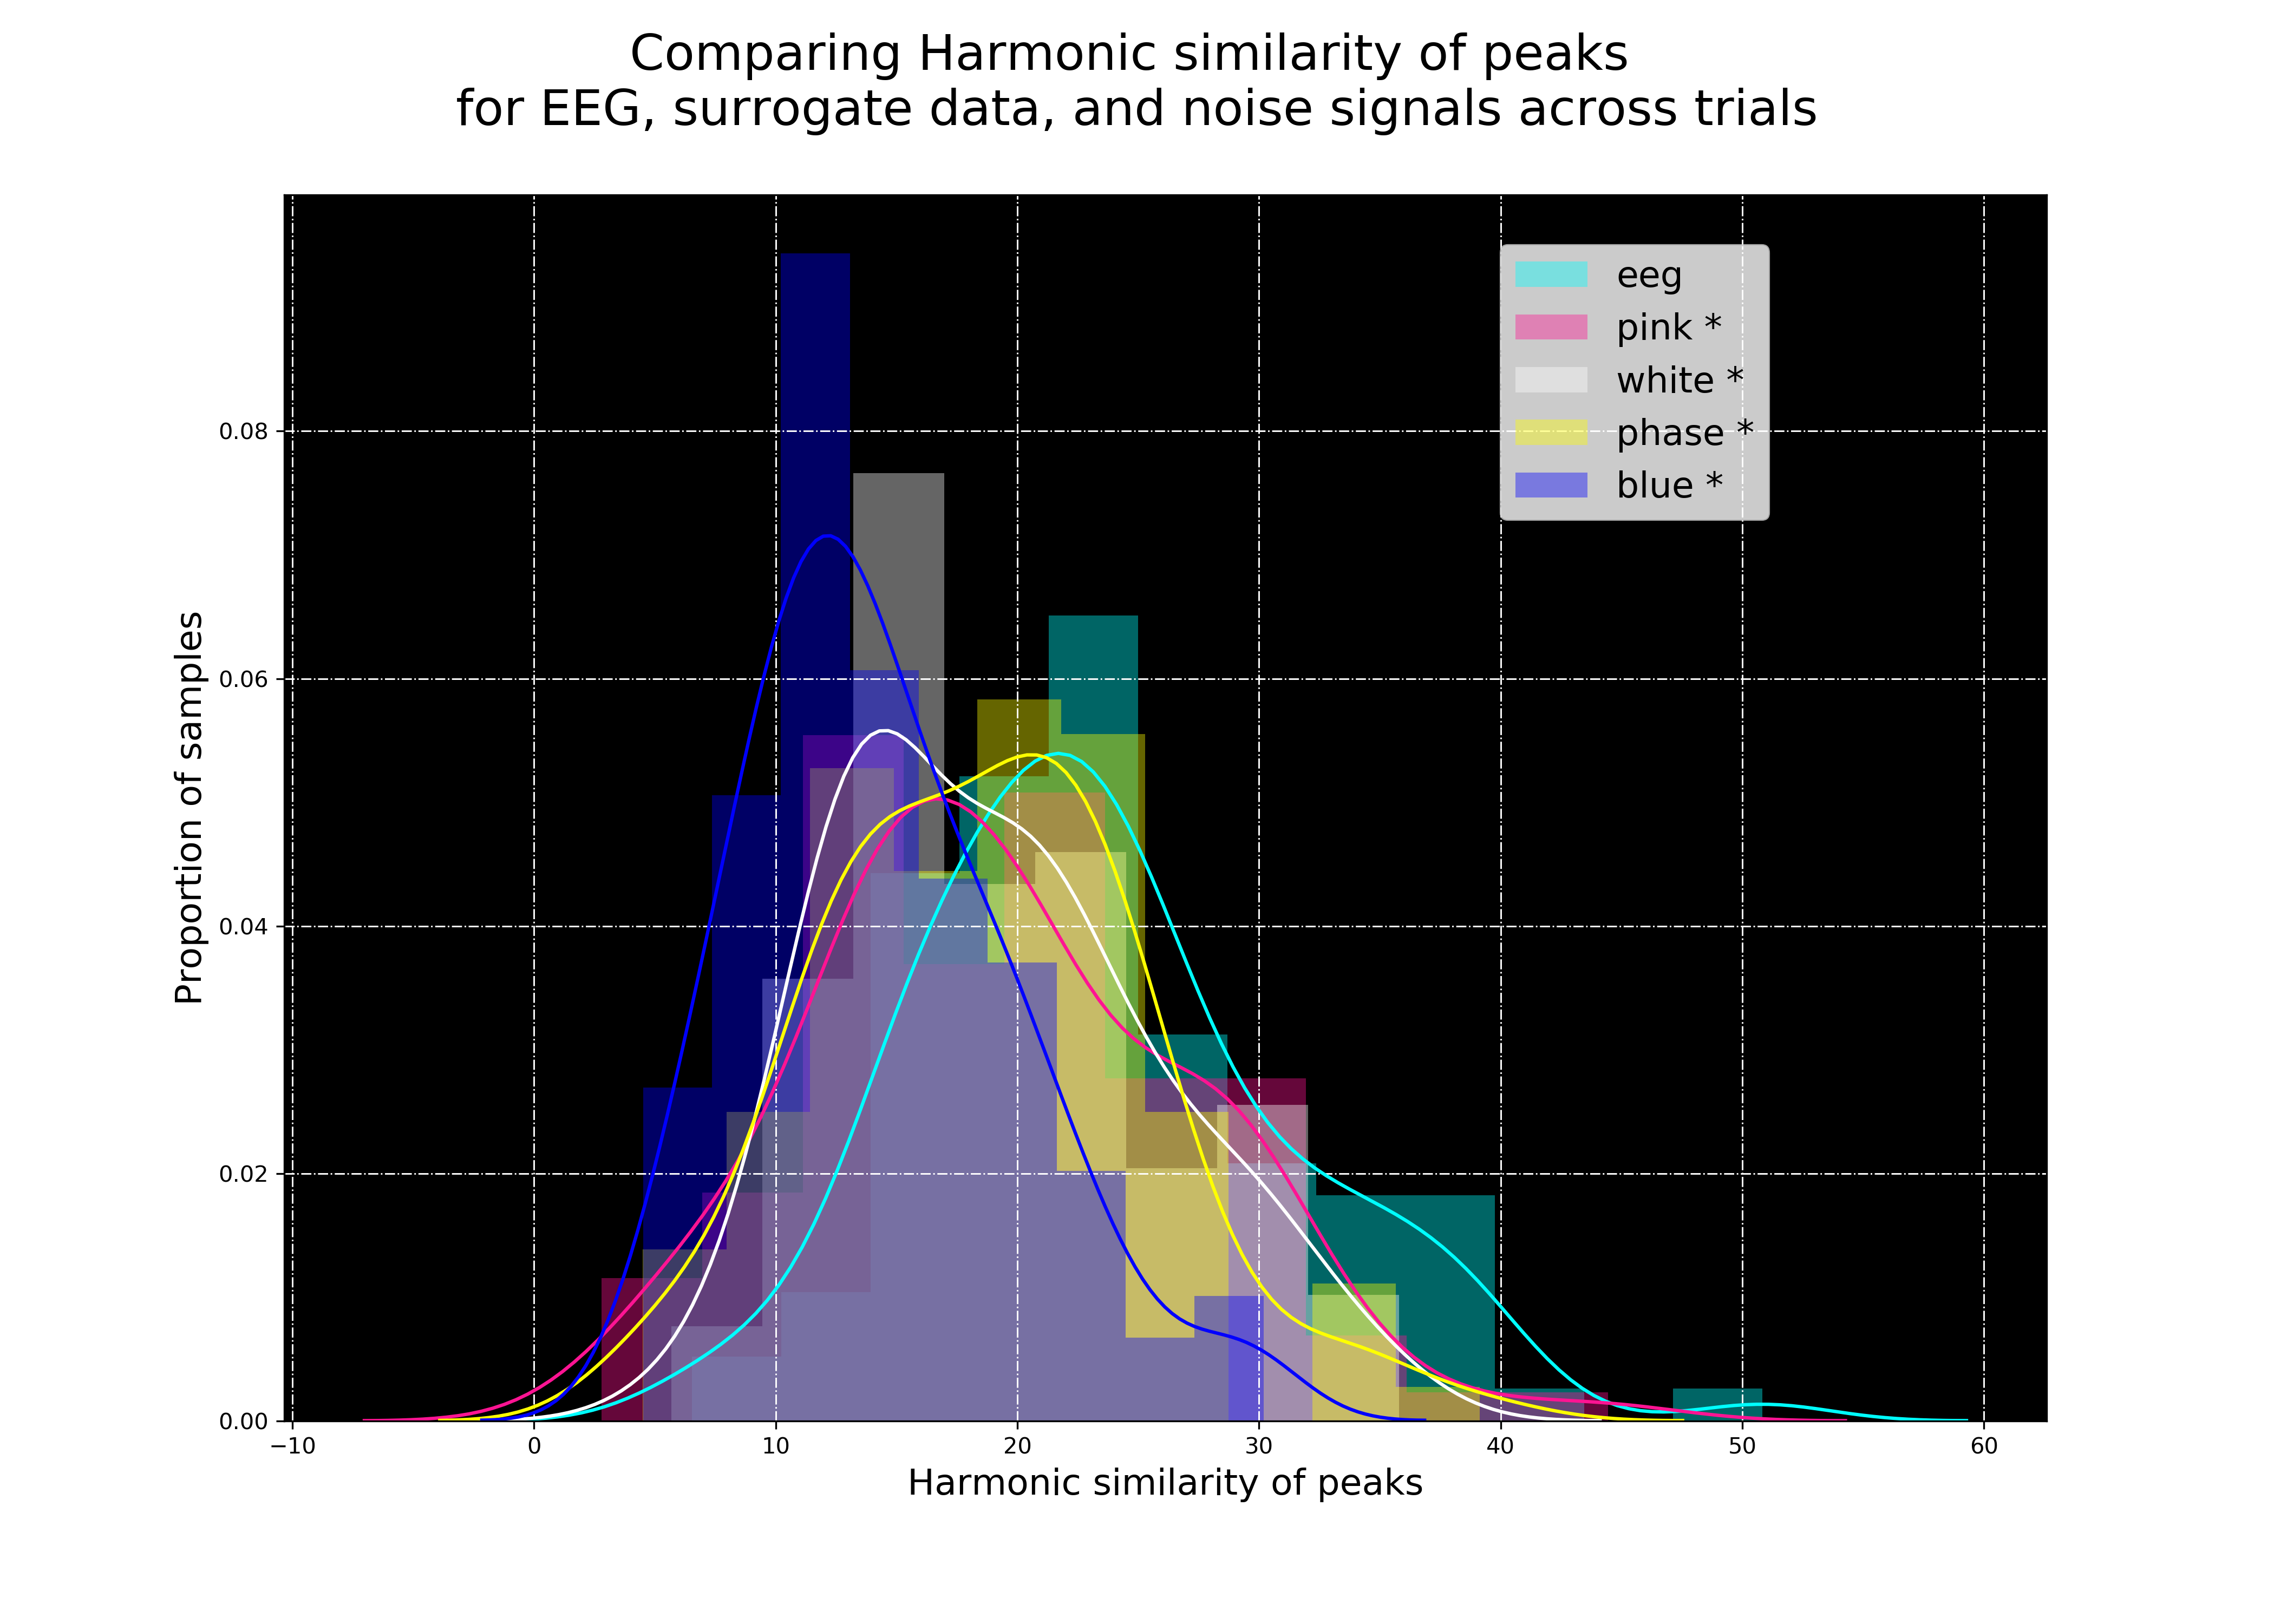
CONSONANCE
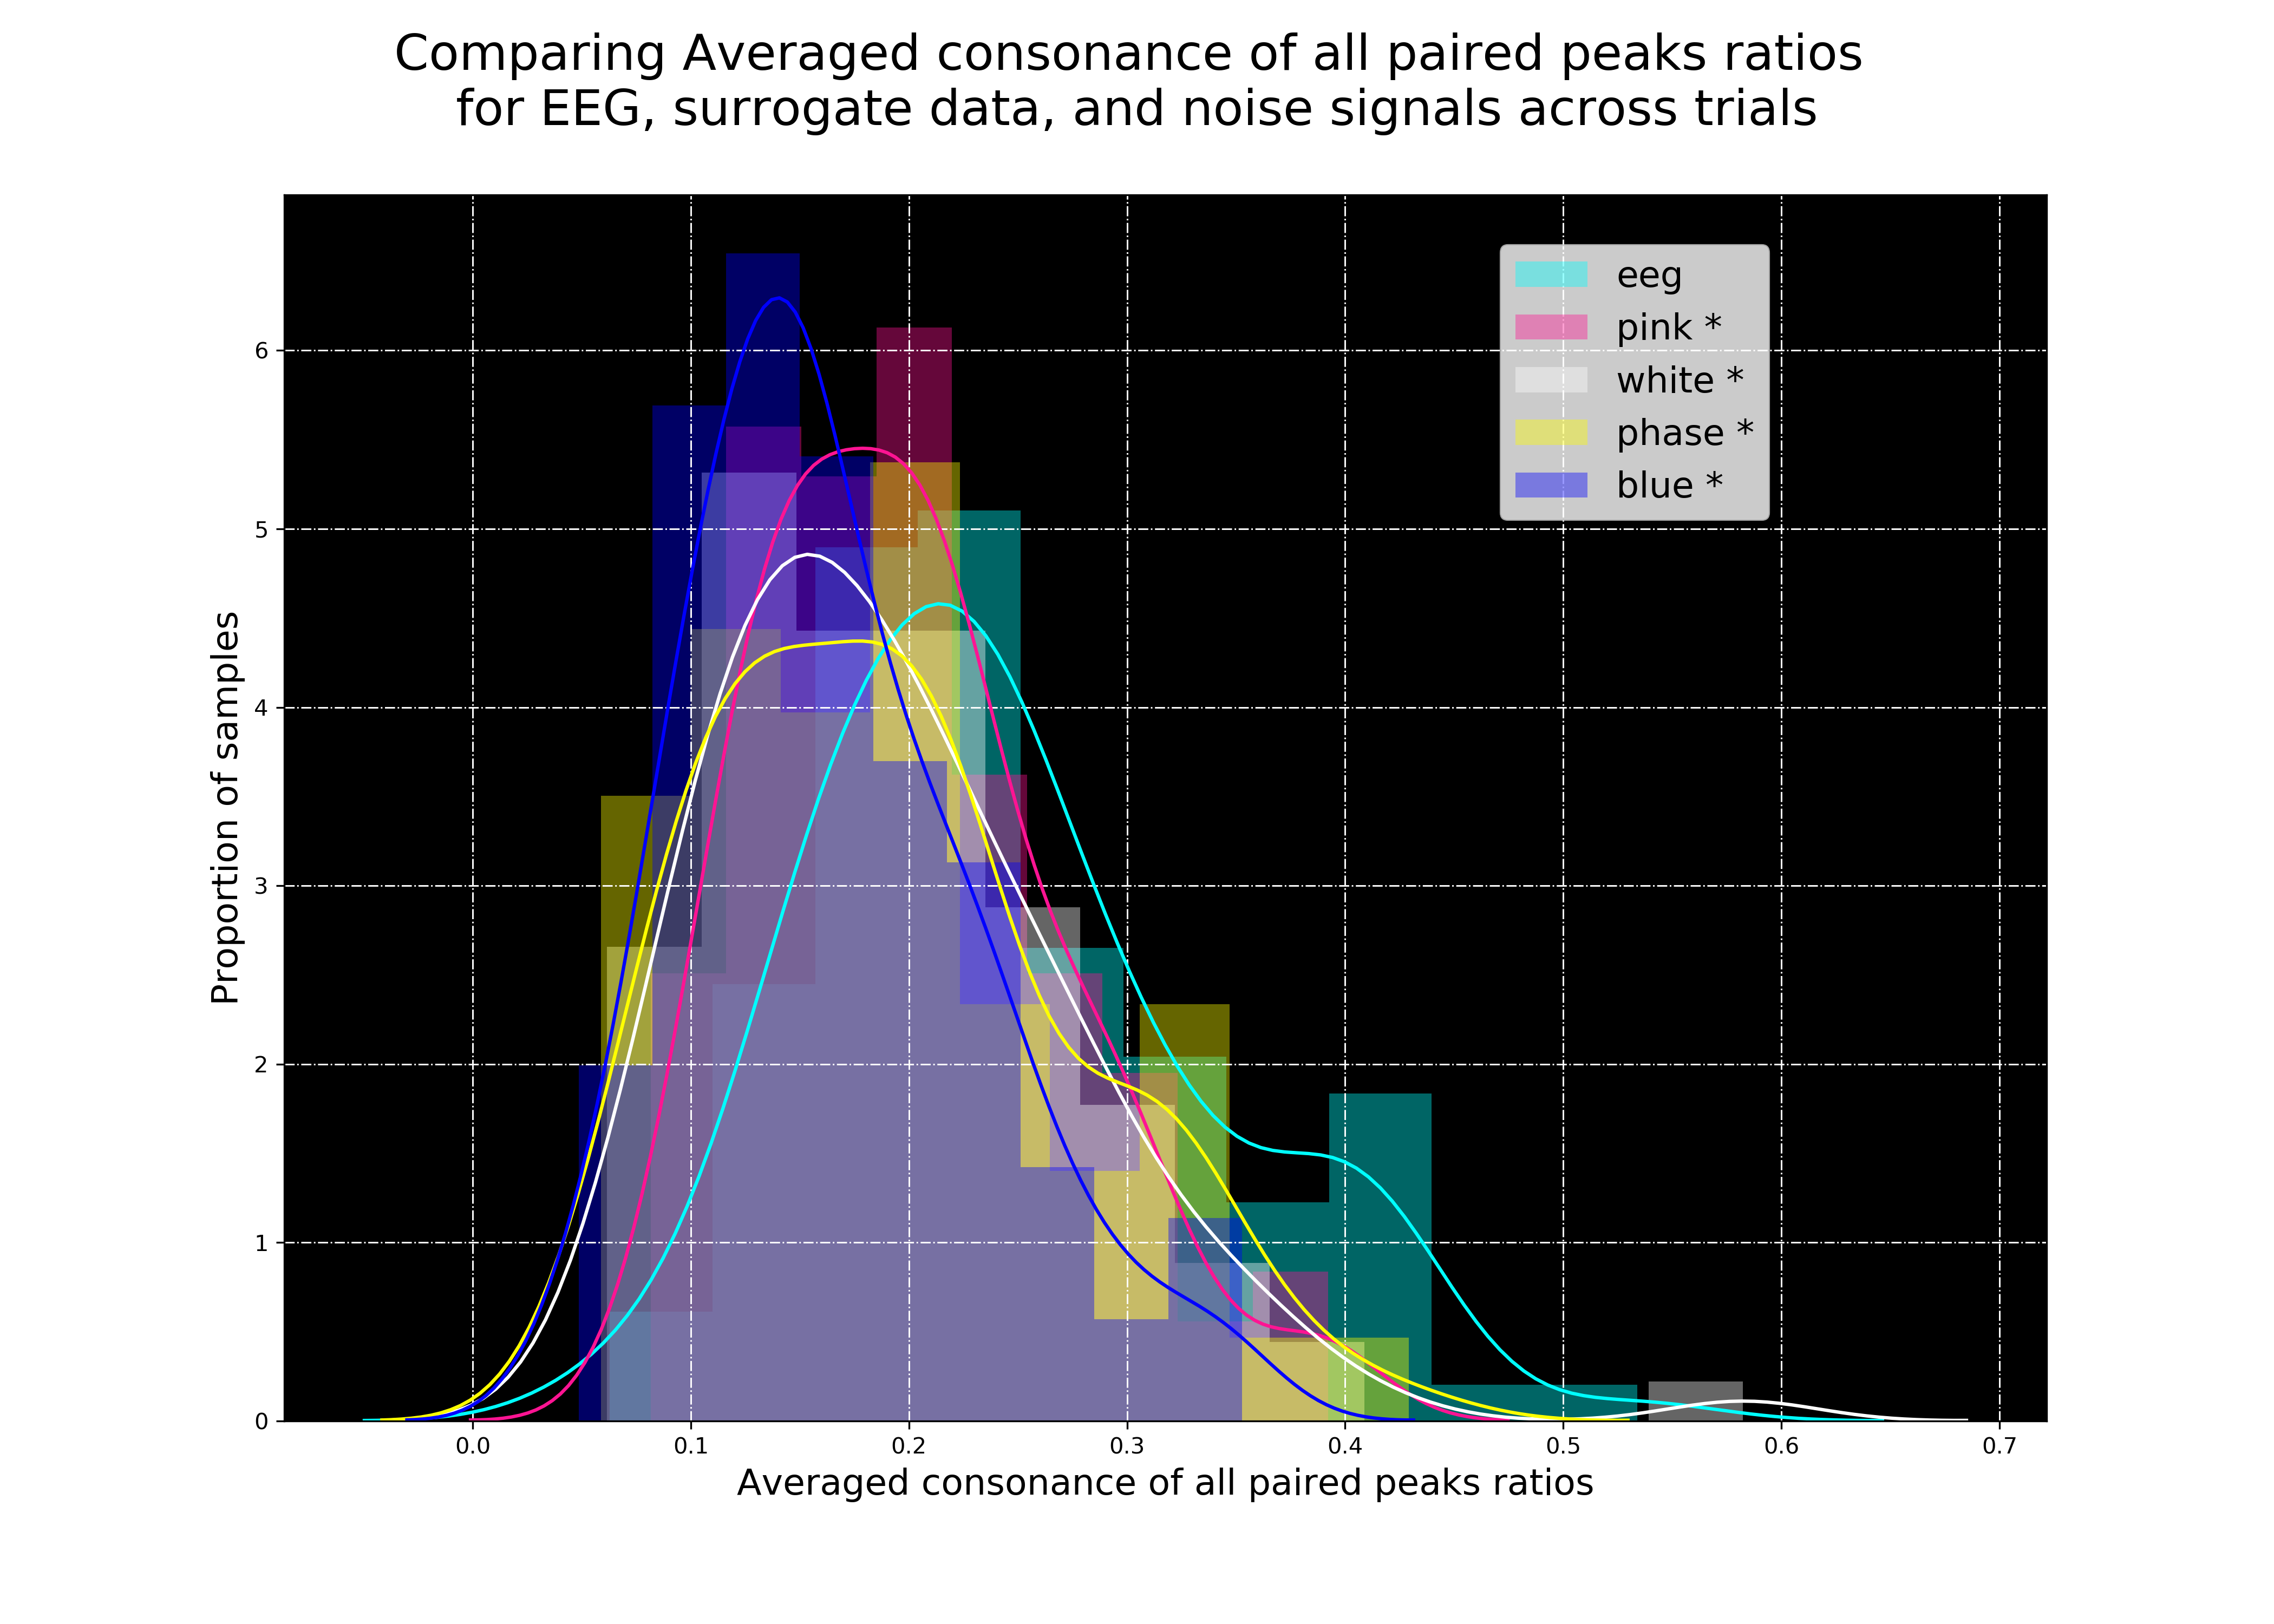
TENNEY'S HEIGHT
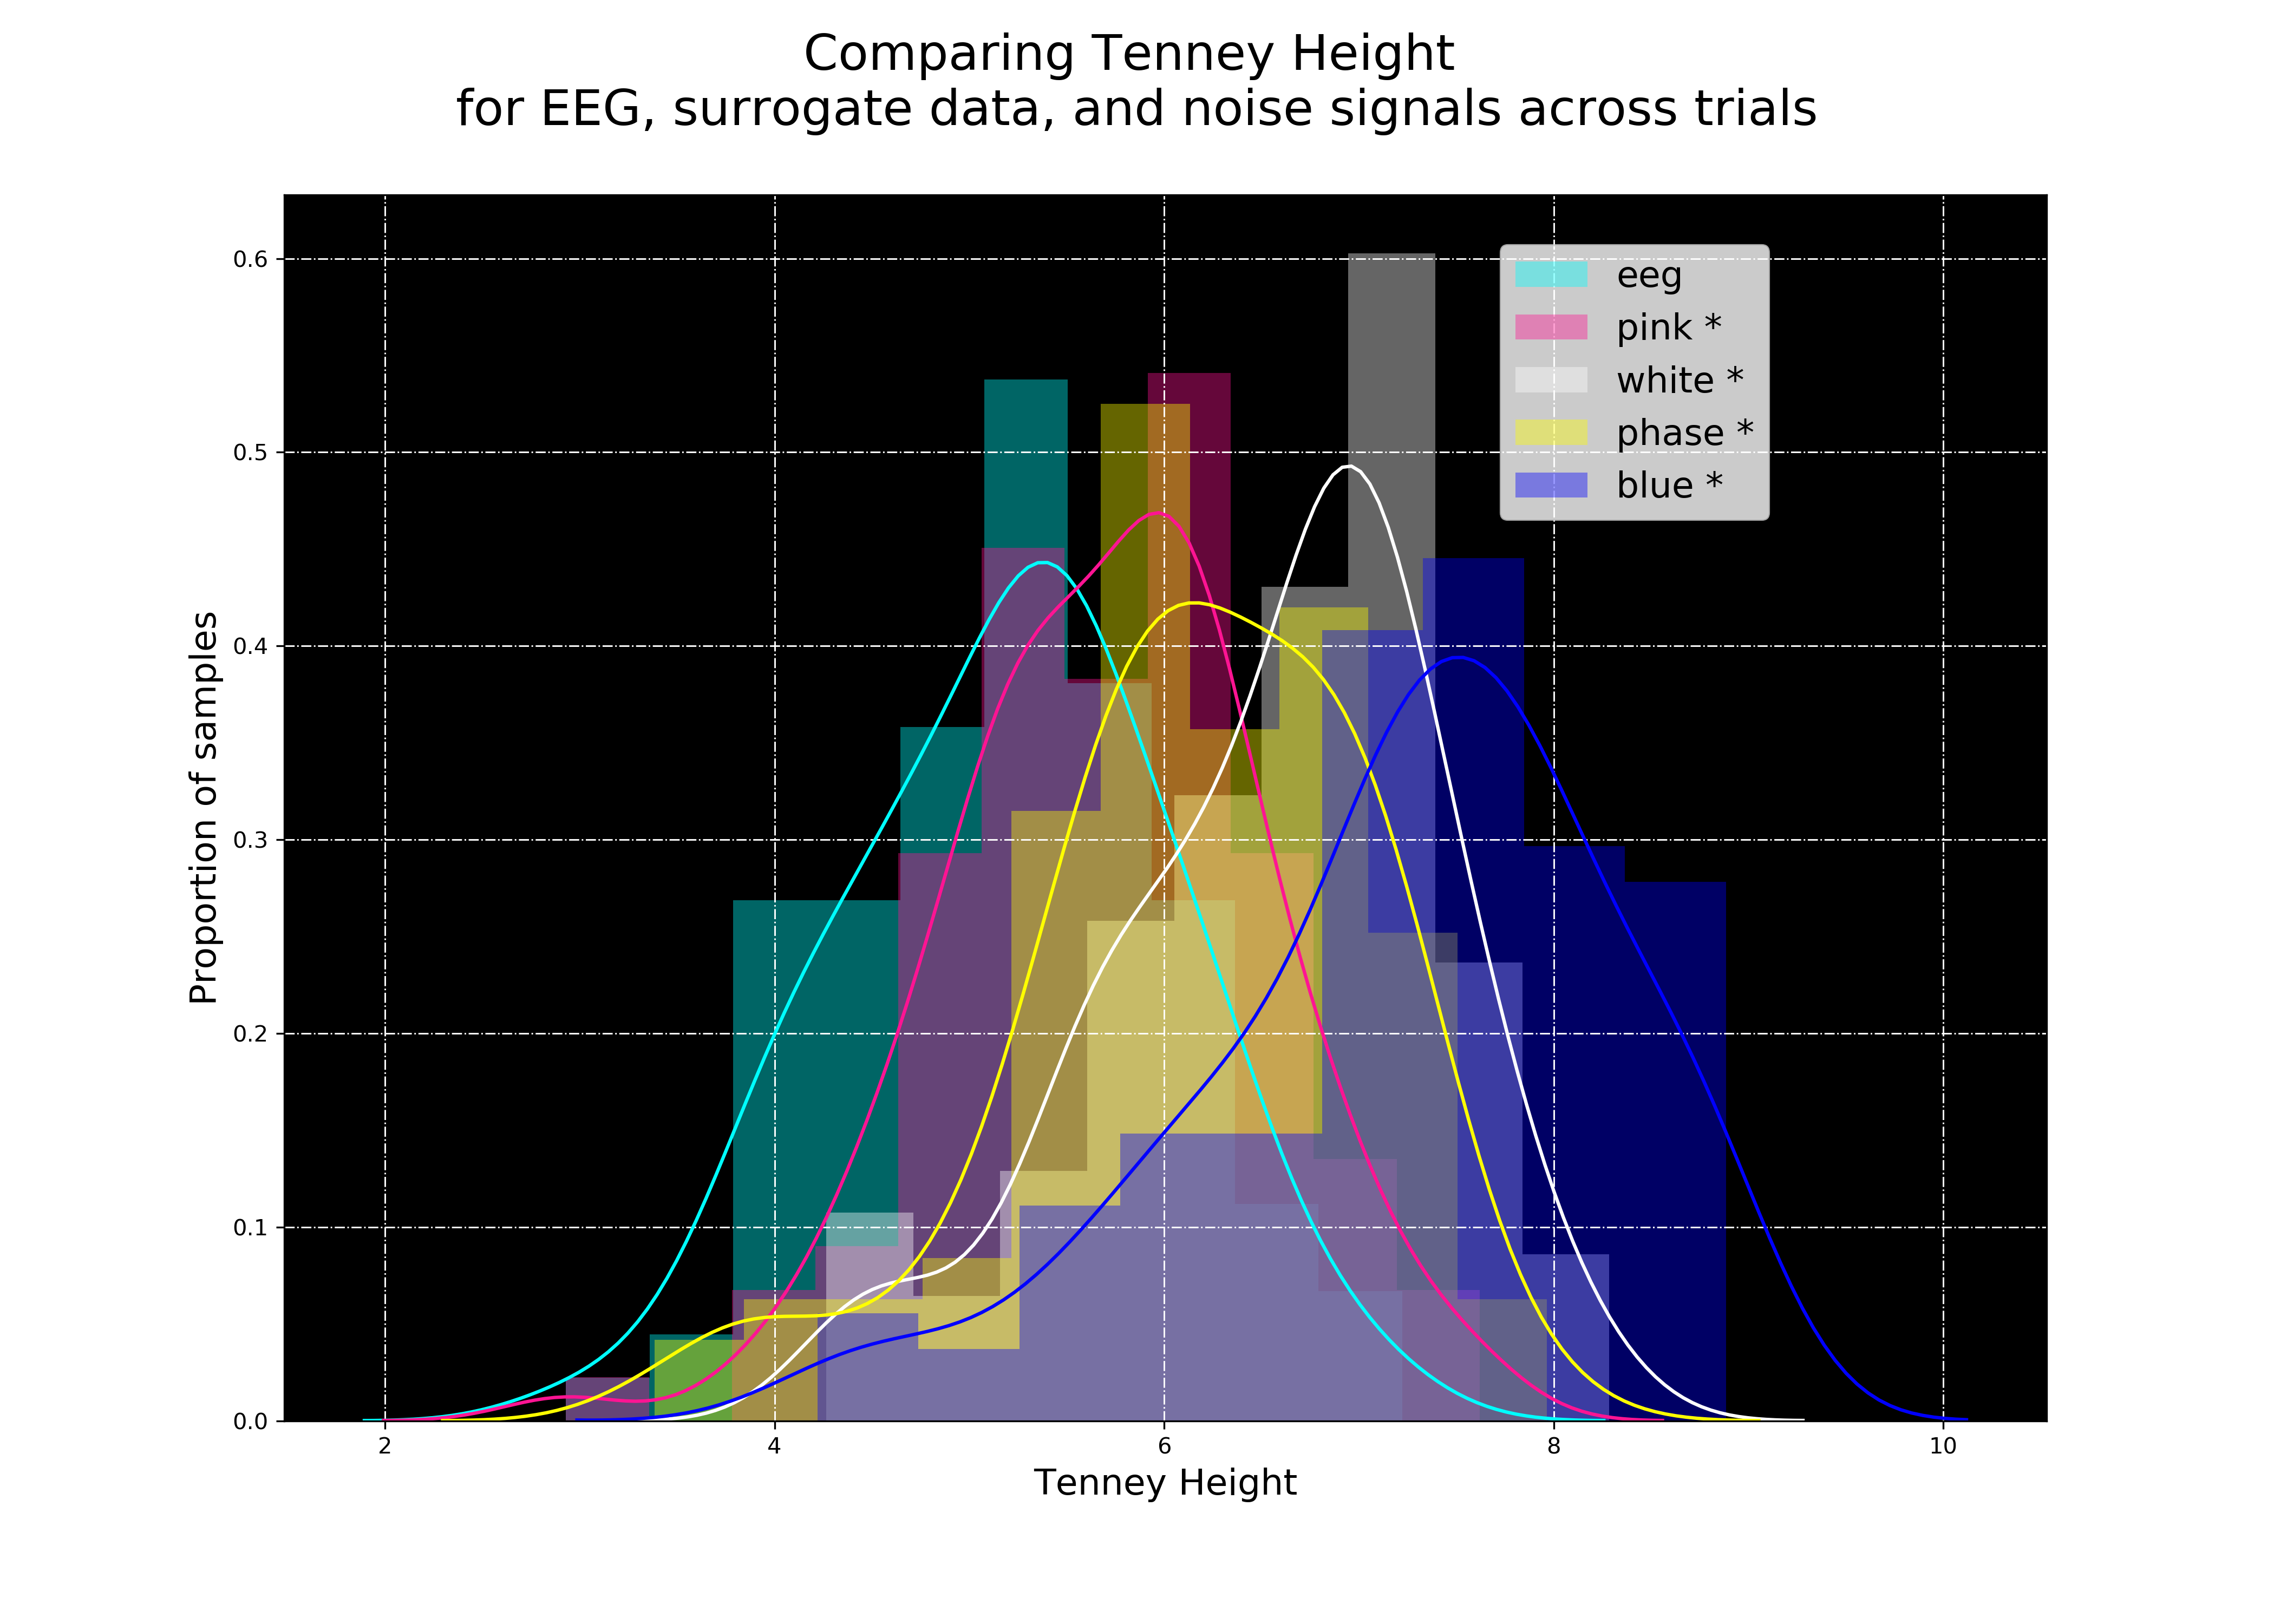

## Ensemble Empirical mode decomposition
HARMONIC SIMILARITY
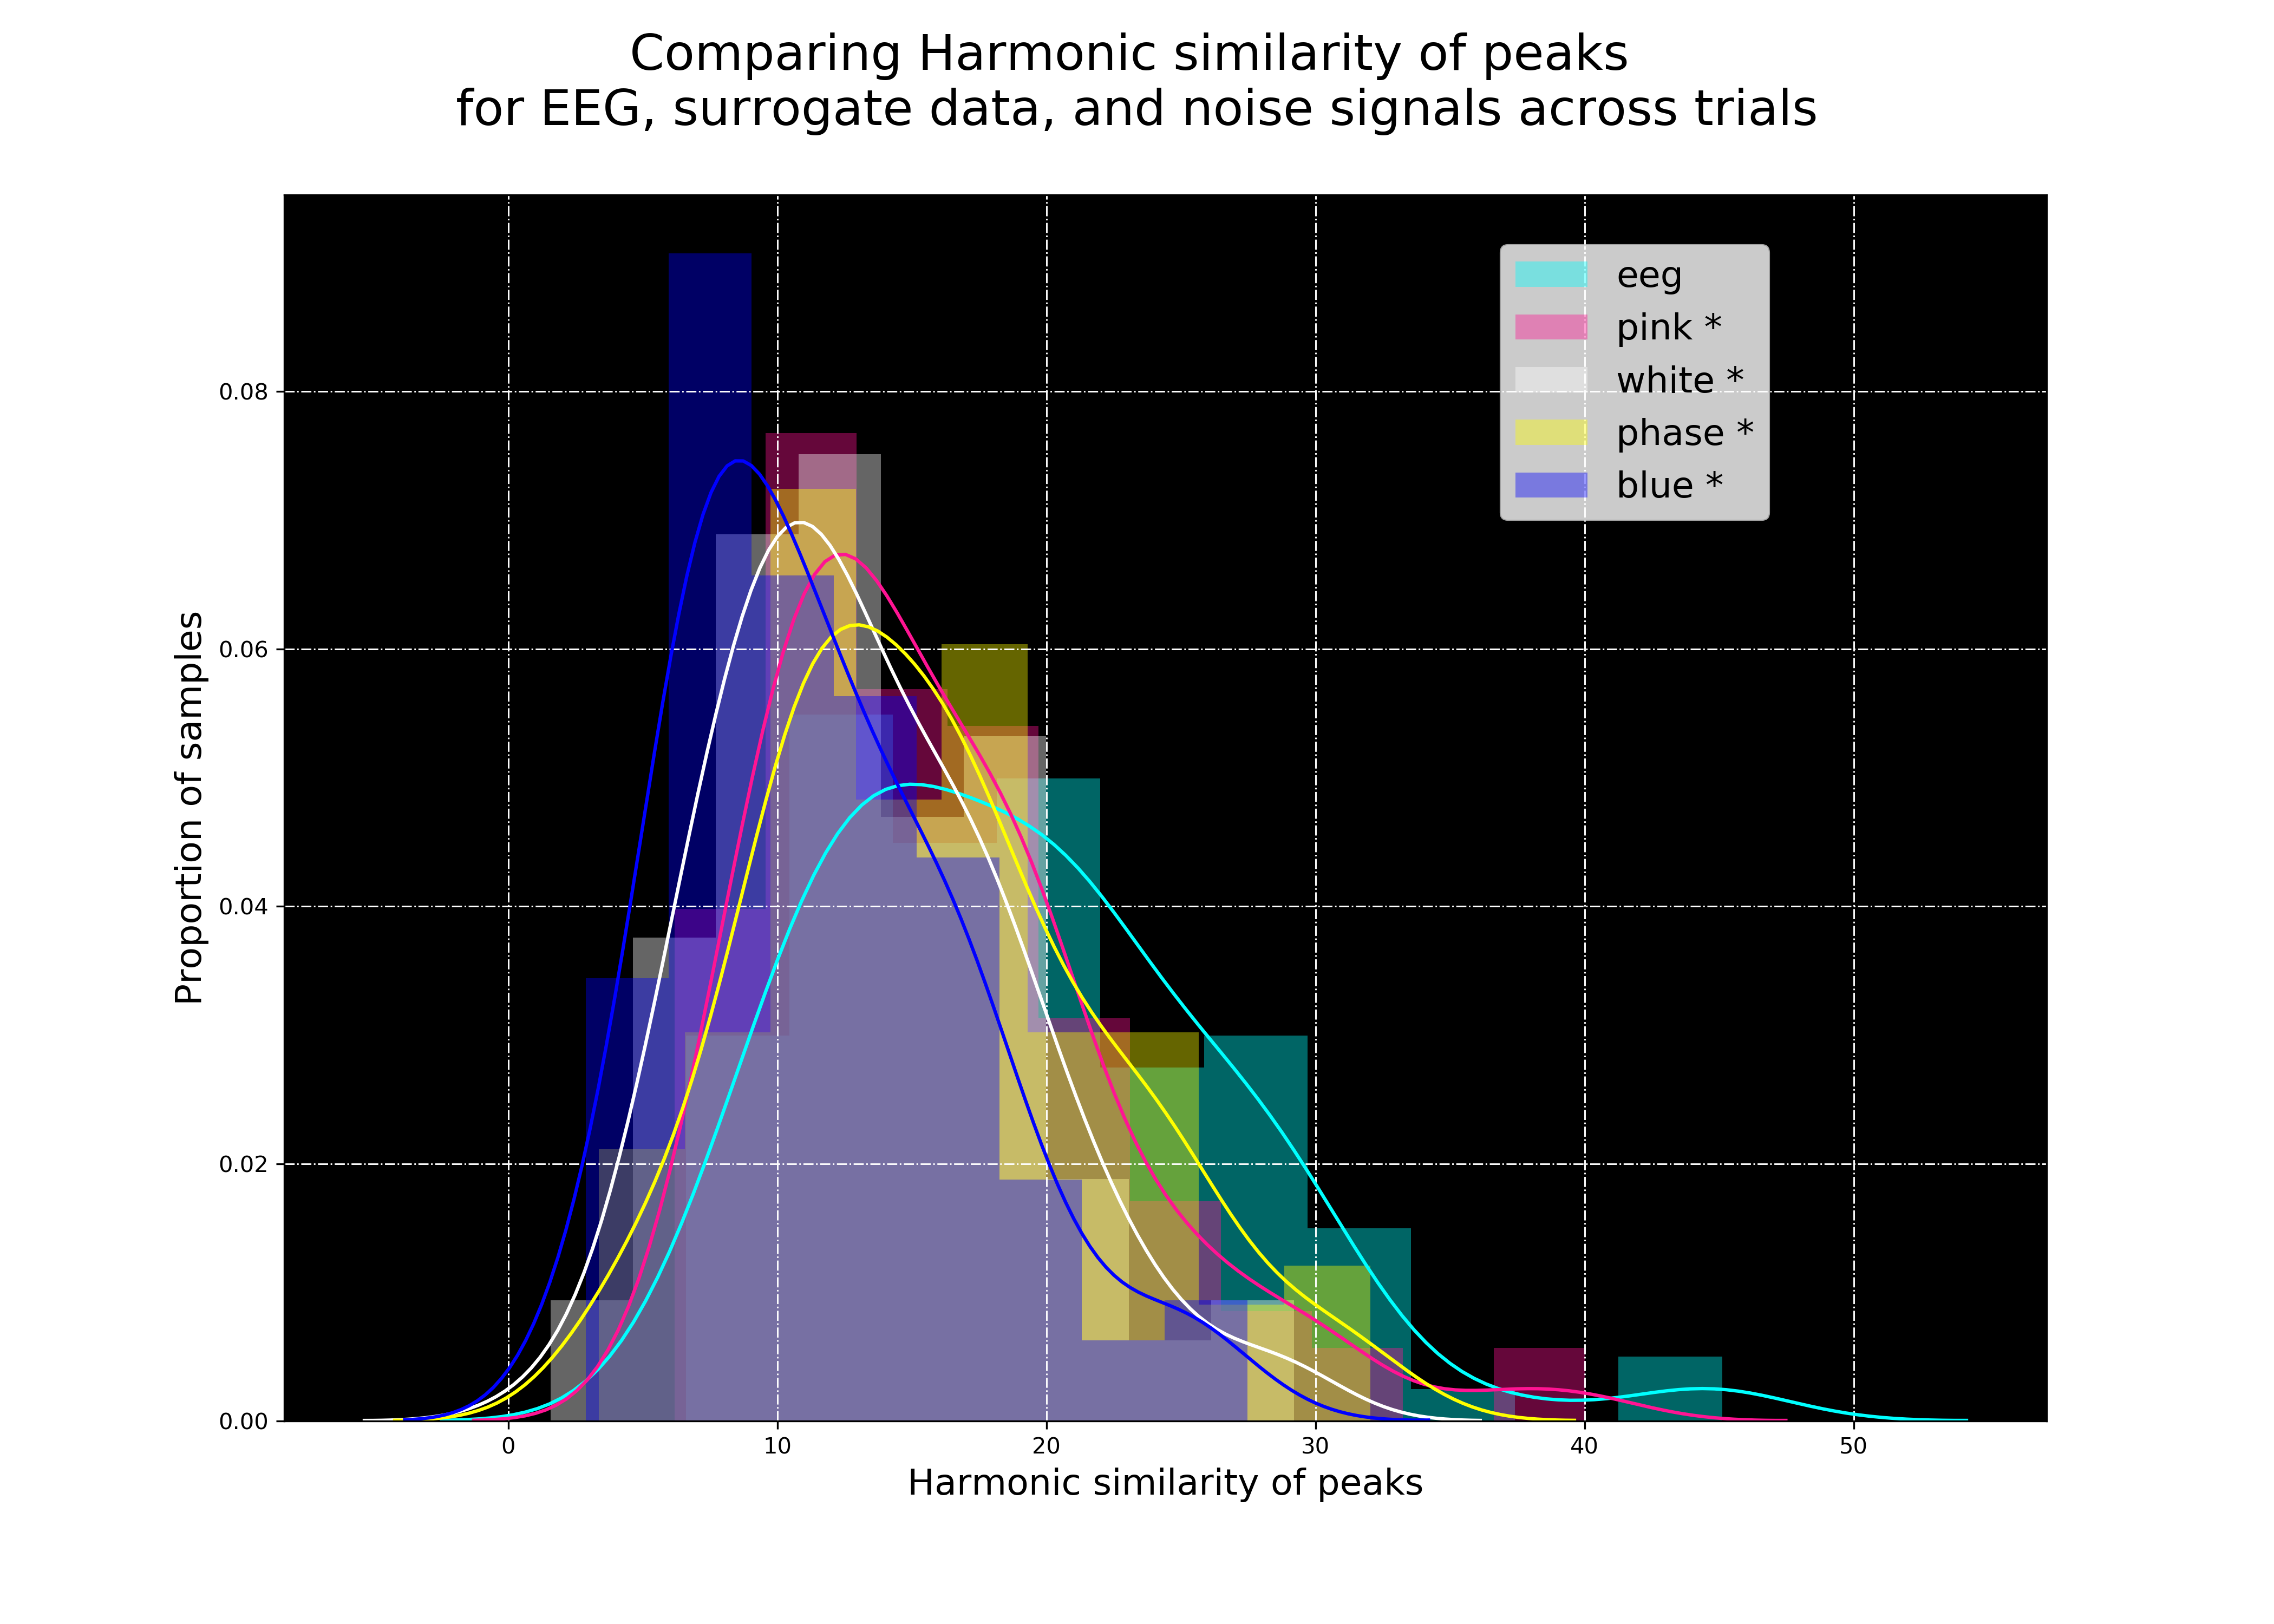
CONSONANCE
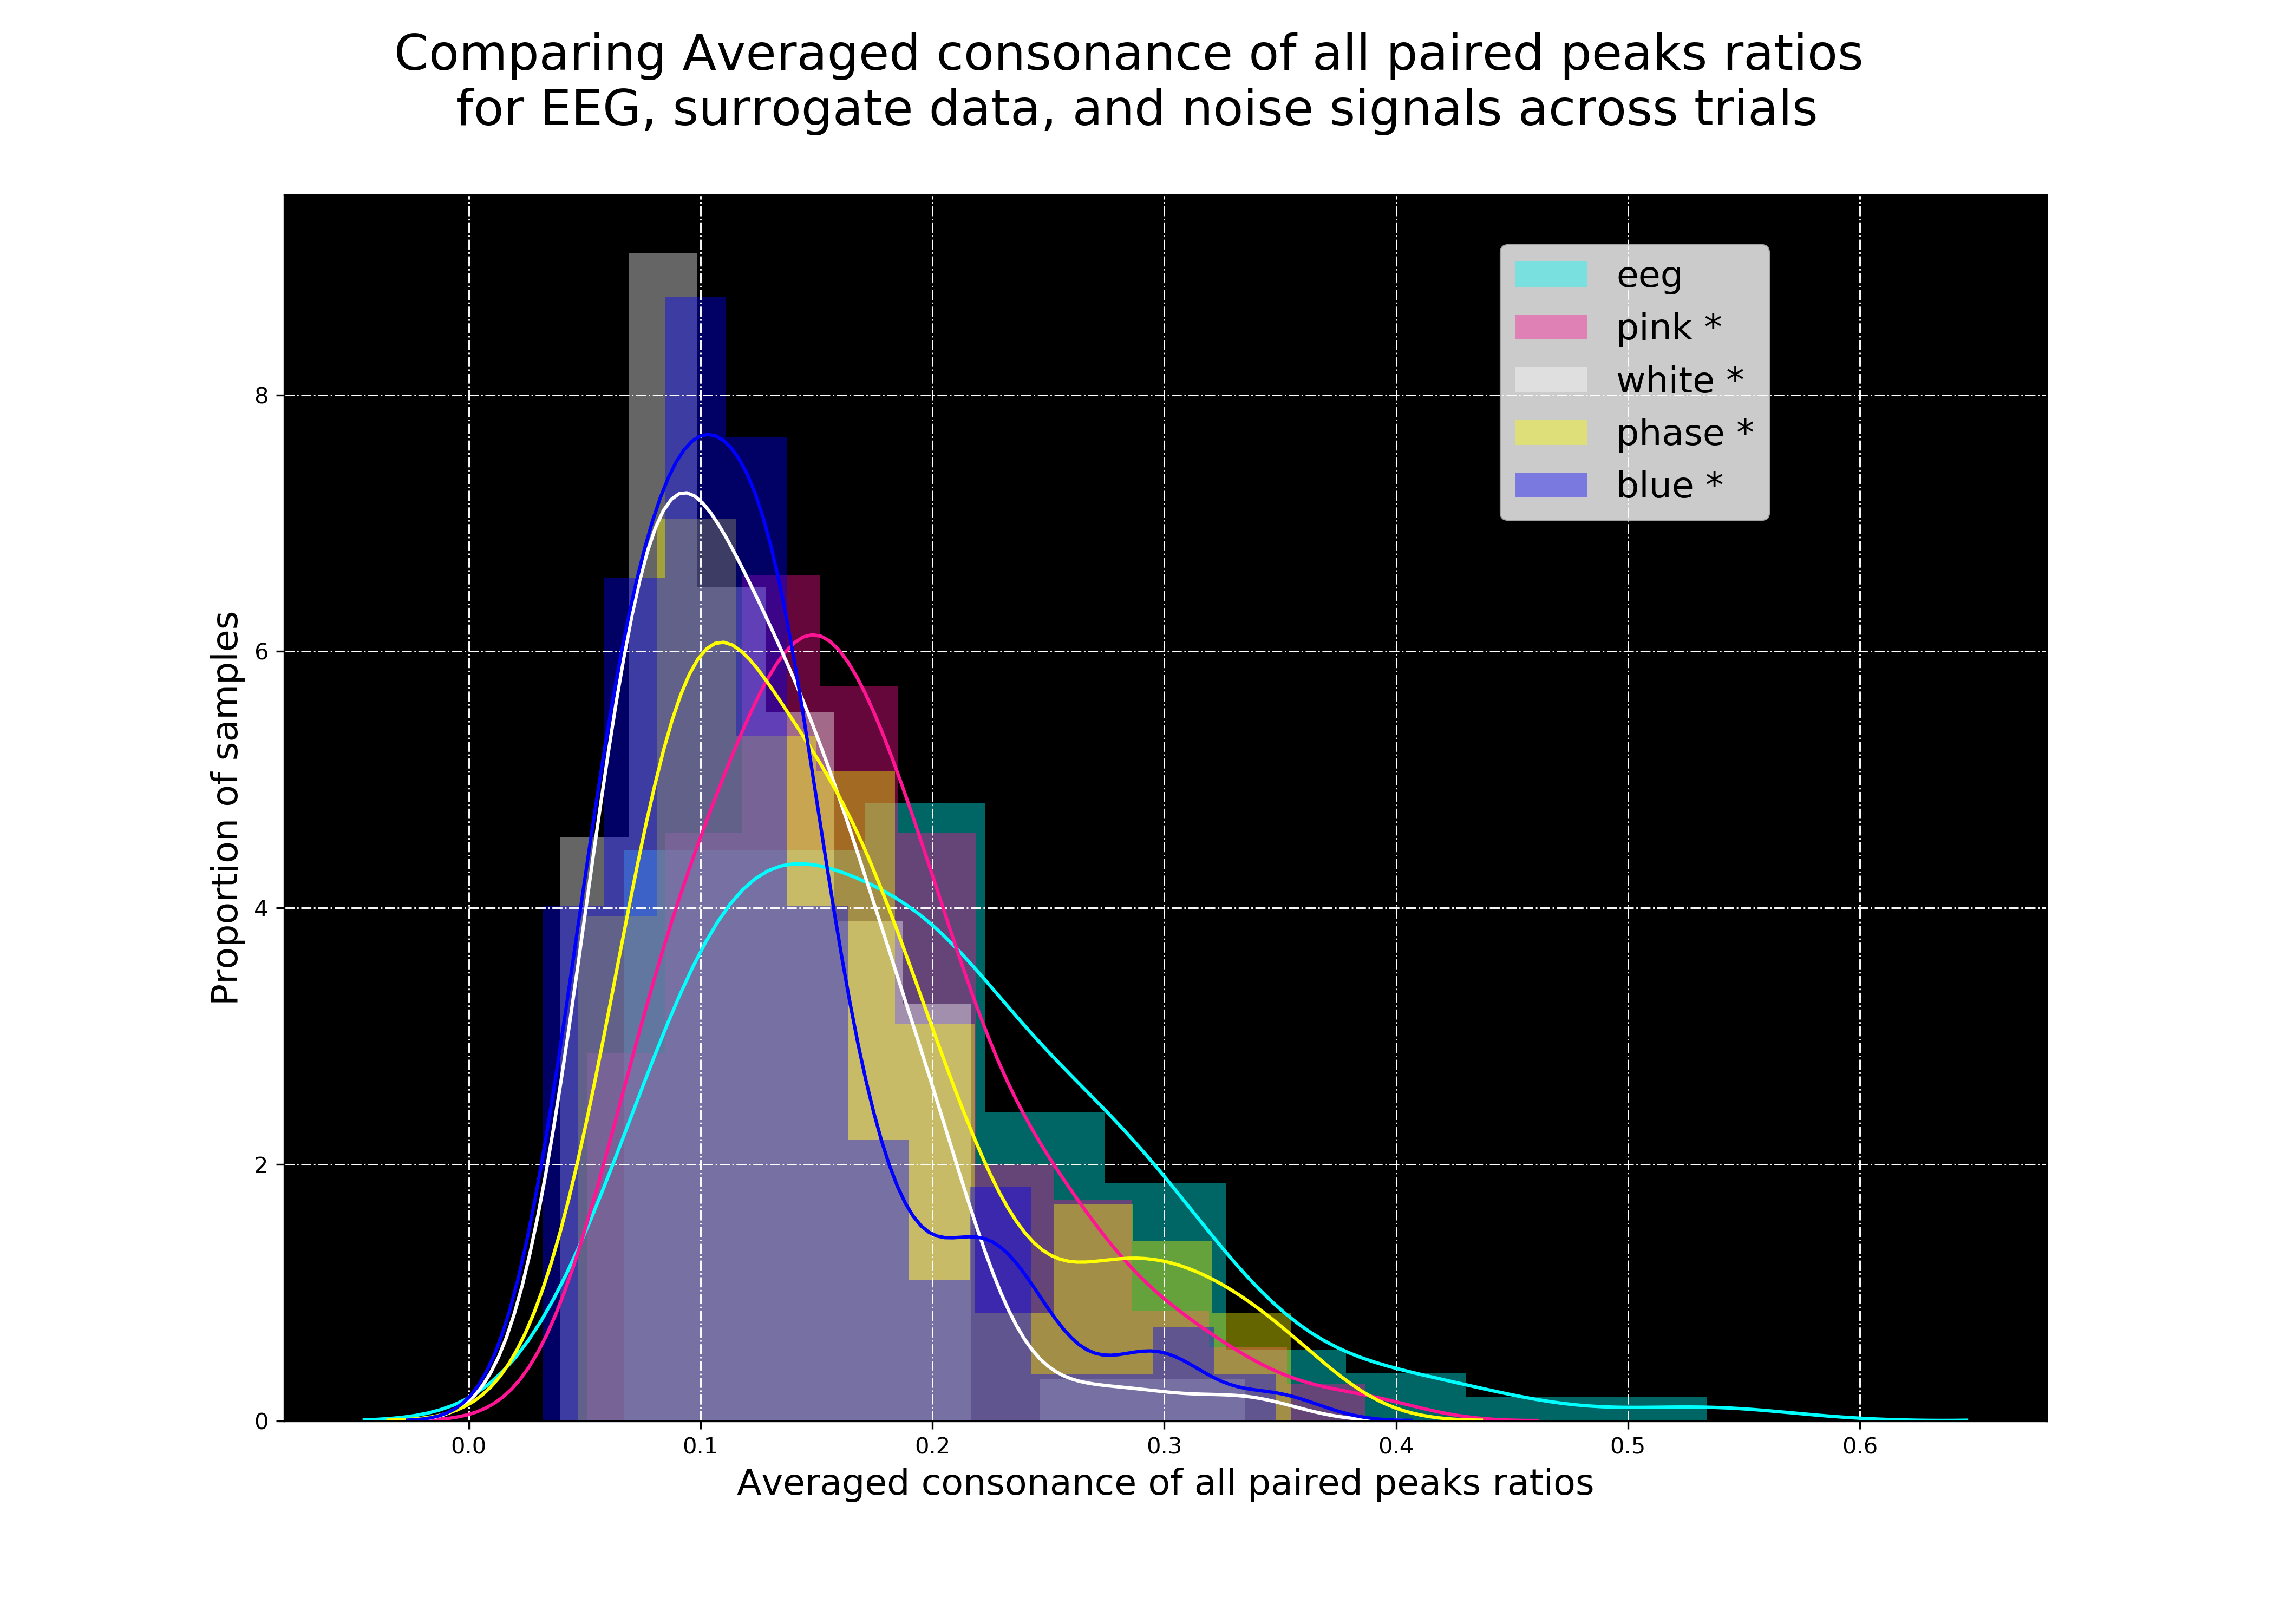
TENNEY'S HEIGHT
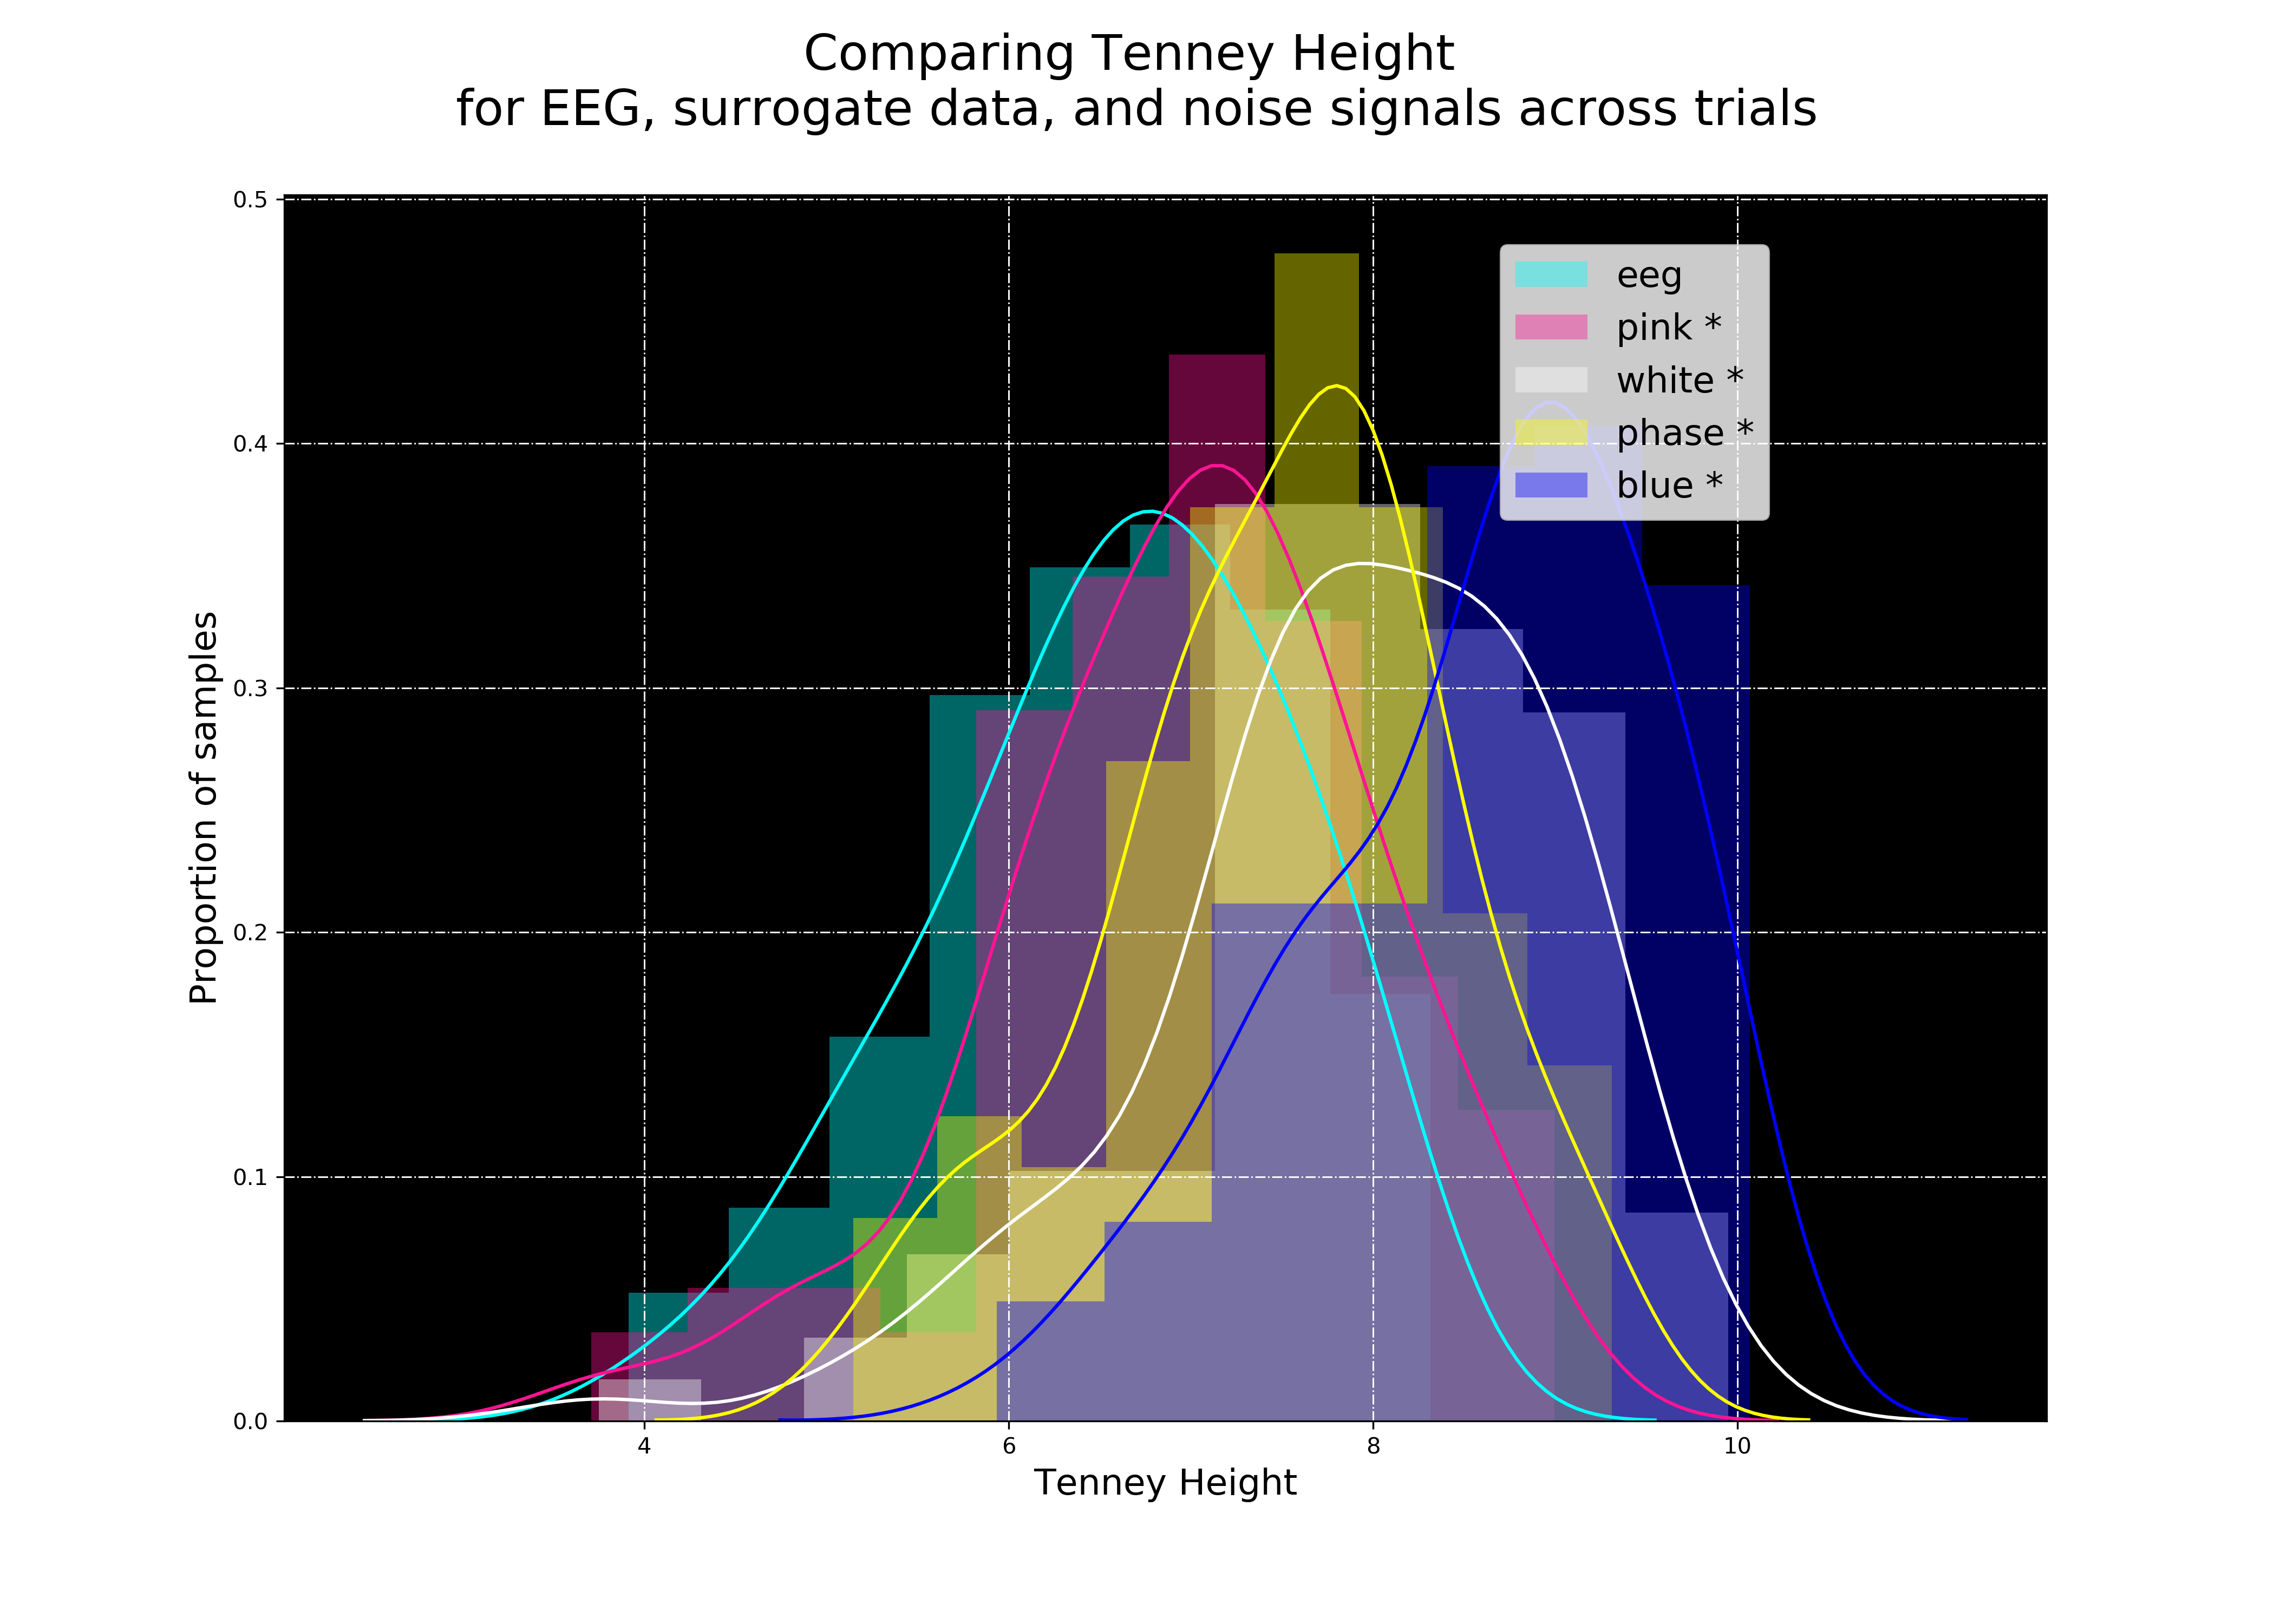

### As we can observe, different metrics of harmonicity can distinguish between EEG signal and different colored noises (pink, white and blue) and surrogate data (random phase)